In [71]:
pip install SQLAlchemy==1.4.46


Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 11.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.io
from utils import *
import hvplot.pandas
import panel as pn
import warnings
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits import mplot3d

#from google.colab import drive

#from google.colab import drive
#drive.mount('/content/drive')

# <font color=33FFF9>**Introduction to Booklet**</font>

<h3 style="font-family:Georgia;"> Introduction</h3>
<p> This documentation is for my thesis project on aircraft design and analysis. This document serves as a comprehensive repository of all the information, work, code, and notes accumulated throughout the course of my research.</p>

<h3 style="font-family:Georgia;"> Purpose</h3>
Within this documentation, you will discover the following key components:

<ul>
    <li><strong>Research Objectives:</strong> Clearly defined goals and objectives guiding the research project.</li>
    <li><strong>Literature Review:</strong> A comprehensive summary of key findings from relevant literature and research in the field of aircraft design and analysis.</li>
    <li><strong>Data Sources:</strong> Documentation of the sources of data utilized, whether obtained from publicly available datasets, industry reports, or proprietary sources.</li>
    <li><strong>Model Development:</strong> Detailed explanation of the development and implementation of any machine learning models or algorithms used in the research, including parameter tuning and validation techniques.</li>
    <li><strong>Results and Analysis:</strong> Presentation of the findings and analysis, including insights or trends discovered from the data.</li>
    <li><strong>References:</strong> A comprehensive list of references cited throughout the documentation, following a consistent citation style.</li>
    <li><strong>Important Notes:</strong> Insights into the rationale behind specific decisions made during the research process and any noteworthy considerations.</li>
</ul>

<h3 style="font-family:Georgia;"> Color Coding</h3>
<ul>
<li style="color: #33FFF9;"><strong>Title:</strong> #33FFF9</li>
<li style="color: #CE33FF;"><strong>Parameters Section:</strong> #CE33FF</li>
<li style="color: #F4AC12;"><strong>Subsections:</strong> #F4AC12</li>
<li style="color: #FF5533;"><strong>Important Notes:</strong> #FF5533</li>
<li style="color: #374DC8;"><strong>Parameter Name:</strong> #374DC8</li>
<li style="color: #44C837;"><strong>Next Steps:</strong> #44C837</li>
<li style="color: #C837A0;"><strong>Explanation:</strong> #C837A0</li>
</ul>

# <font color=33FFF9>**Standard Units In Aviation**</font>
<p> The standard SI Units are taken from the following link: <a href=https://en.wikipedia.org/wiki/International_Civil_Aviation_Organization">Civil Aviation SI Units</a>

<table style="width:100%">
  <tr>
    <th>Parameter</th>
    <th>Unit</th>
  </tr>
  <tr>
    <td>Speed</td>
    <td>km/h</td>
  </tr>
  <tr>
    <td>Distance</td>
    <td>km</td>
  </tr>
  <tr>
    <td>Altitude</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Weight</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Fuel Capacity	</td>
    <td>Liters (L)</td>
  </tr>
  <tr>
    <td>Fuel Weight	</td>
    <td>kg</td>
  </tr>
  <tr>
    <td>Thrust</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Temperature</td>
    <td>Celsius (°C)</td>
  </tr>
  <tr>
    <td>Acceleration</td>
    <td>Meters per second squared (m/s²)</td>
  </tr>
  <tr>
    <td>Force</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Density</td>
    <td>Kilograms per cubic meter (kg/m³)</td>
  </tr>
  <tr>
    <td>Length</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Width</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Wing Span</td>
    <td>meters</td>
  </tr>
  <tr>
    <td>Thrust/Shaft Power</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Wing Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Tail Loading</td>
    <td>N/m²</td>
  </tr>
  <tr>
    <td>Rate of Climb (ROC)</td>
    <td>m/s</td>
  </tr>
  <tr>
    <td>Fuselage Length</td>
    <td>meters</td>
  </tr>
  </tr>
</table>



# <font color=33FFF9>**Dataset: Aircraft Performance (Aircraft Bluebook)**</font>

<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/heitornunes/aircraft-performance-dataset-aircraft-bluebook/versions/11?resource=download&select=Airplane_Cleaned.csv">Aircraft Bluebook</a>



This dataset contains 861 airplanes and 102 helicopters and their characteristics, such as Max Speed, Cruise Speed, Range, etc. Data wrangling is recommend for data analysis, since there's a lot of missing values, different data formats and units for the same features.



## <font style="color: #CE33FF;"> Features Updated: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Company:</span></strong> Company's name..</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> Engine type used in the airplane..</li>
    <li><strong><span style="color: #374DC8;">Multi Engine:</span></strong> Multi Enginer or not.</li>
    <li><strong><span style="color: #374DC8;">TP Models:</span></strong> Third Party Modifications.</li>
    <li><strong><span style="color: #374DC8;">*THR (Thurst Power):</span></strong> Engine's ability to produce thrust. Only applicable to jet engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">SHP (Shaft Power):</span></strong> Engine's ability to produce shaft power. Only applicable to piston engines or turboprop engines. Units: HP or lbf</li>
    <li><strong><span style="color: #374DC8;">Length:</span></strong> Airplane's length. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Height:</span></strong> Airplane's height. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">Wing Span:</span></strong> Airplane's wingspan. Units: ft + in.</li>
    <li><strong><span style="color: #374DC8;">FW (Fuel Weight):</span></strong> Indicates the weight of the fuel in pounds. In aviation, fuel is often measured and stored in gallons, particularly in smaller aircraft. However, fuel consumption and performance calculations are typically done based on weight rather than volume, as weight directly affects the aircraft's performance</li>
    <li><strong><span style="color: #374DC8;">MEW (Manufacturer's Empty Weight):</span></strong> Empty weight lbs. It's the weight of the aircraft "as built" and includes the weight of the structure, power plant, furnishings, installations, systems, and other equipments.</li>
    <li><strong><span style="color: #374DC8;">AUW:</span></strong> All-Up Weight. Total aircraft weight at any moment during the flight.</li>
    <li><strong><span style="color: #374DC8;">Vmax (Max speed Knots):</span></strong> Airplane's maximum speed. Units: Knot or Mach.</li>
    <li><strong><span style="color: #374DC8;">Vcruise (Rcmnd cruise Knots):</span></strong> Airplane's High cruise speed. Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Vstall (Stall Knots dirty):</span></strong> Airplane's stall speed on "dirty" configuration (flaps out, gear down, etc.). Units: Knot.</li>
    <li><strong><span style="color: #374DC8;">Hmax (All Engine Service Ceiling):</span></strong>The All Engine Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with all engines operating at maximum power. It accounts for the aircraft's performance capabilities under normal operating conditions.</li>
    <li><strong><span style="color: #374DC8;">Hmax (One) (Engine Out Service Ceiling):</span></strong> The Engine Out Service Ceiling indicates the highest altitude at which the aircraft can maintain level flight with one engine inoperative. It accounts for the reduced performance and climb capability resulting from the loss of an engine.</li>
    <li><strong><span style="color: #374DC8;">ROC (All eng rate of climb):</span></strong> Airplane's rate of climb with all engines working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">ROC(One) (Eng out rate of climb):</span></strong> Airplane's rate of climb with one engine working. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Vlo (Takeoff over 50ft):</span></strong> Airplane's climb speed during normal take-off for 50 ft obstacle. Units: ft/min.</li>
    <li><strong><span style="color: #374DC8;">Slo (Takeoff ground run):</span></strong> Airplane's takeoff ground run. Units: ft.</li>
    <li><strong><span style="color: #374DC8;">VI (Landing over 50ft):</span></strong></li>
    <li><strong><span style="color: #374DC8;">SI (Landing ground roll):</span></strong> </li>
    <li><strong><span style="color: #374DC8;">Range:</span></strong> Airplane's range. Units: N.m. (Nautical miles).</li>
</ul>


In [16]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [32]:
aircraft_performance_dataset = pd.read_csv('Datasets/Aircraft Performance (Aircraft Bluebook)/Airplane_Cleaned.csv')
aircraft_performance_dataset

,Model,Company,Engine Type,Multi Engine,TP mods,THR,SHP,Length,Height,Wing Span,...,Vstall,Hmax,Hmax (One),ROC,ROC (One),Vlo,Slo,Vl,Sl,Range
0,15 AC Sedan,Aeronca,Piston,NaN,False,NaN,145.0,25.250000,10.250000,37.416667,...,46.0,13000.0,NaN,450.0,NaN,900.0,NaN,1300.0,NaN,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,False,NaN,85.0,20.583333,8.750000,36.083333,...,44.0,12300.0,NaN,600.0,NaN,720.0,NaN,800.0,NaN,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,False,NaN,90.0,21.416667,8.583333,35.000000,...,37.0,16000.0,NaN,650.0,NaN,475.0,NaN,850.0,NaN,210.0
3,7 DC Champ,Aeronca,Piston,NaN,False,NaN,85.0,21.416667,8.583333,35.000000,...,37.0,13000.0,NaN,620.0,NaN,500.0,NaN,850.0,NaN,210.0
4,7 AC Champ,Aeronca,Piston,NaN,False,NaN,65.0,21.416667,8.750000,35.000000,...,33.0,12500.0,NaN,370.0,NaN,632.0,NaN,885.0,NaN,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,True,False,NaN,260.0,35.083333,14.416667,49.416667,...,54.0,22500.0,7850.0,1400.0,320.0,1210.0,970.0,1150.0,865.0,957.0
856,500,Twin Commander A/C,Piston,True,False,NaN,250.0,35.083333,14.416667,49.000000,...,55.0,22500.0,7150.0,1400.0,290.0,1250.0,1000.0,1350.0,950.0,957.0
857,520,Twin Commander A/C,Piston,True,False,NaN,260.0,35.416667,14.416667,44.083333,...,52.0,24000.0,8500.0,1700.0,400.0,1100.0,950.0,1050.0,900.0,1000.0
858,2180,Varga,Piston,NaN,False,NaN,180.0,21.166667,7.000000,30.000000,...,45.0,22000.0,NaN,1310.0,NaN,NaN,NaN,NaN,NaN,365.0


In [33]:
aircraft_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         860 non-null    object 
 1   Company       860 non-null    object 
 2   Engine Type   860 non-null    object 
 3   Multi Engine  381 non-null    object 
 4   TP mods       860 non-null    bool   
 5   THR           156 non-null    float64
 6   SHP           704 non-null    float64
 7   Length        846 non-null    float64
 8   Height        843 non-null    float64
 9   Wing Span     856 non-null    float64
 10  FW            855 non-null    float64
 11  MEW           840 non-null    float64
 12  AUW           857 non-null    float64
 13  Vmax          817 non-null    float64
 14  Vcruise       838 non-null    float64
 15  Vstall        762 non-null    float64
 16  Hmax          827 non-null    float64
 17  Hmax (One)    361 non-null    float64
 18  ROC           798 non-null    

In [34]:
aircraft_performance_dataset = aircraft_performance_dataset.drop(['TP mods', 'Vstall', 'ROC (One)', 'Vlo', 'Slo', 'Vl',	'Sl', 'Hmax (One)', 'Multi Engine'], axis=1)
aircraft_performance_dataset

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [35]:
aircraft_performance_dataset = aircraft_name(aircraft_performance_dataset, 'Model')
aircraft_performance_dataset

/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column_name][i] = str(dataset[column_name][i])
/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column_name][i] = dataset[column_name][i][:idx_opening_bracket].strip()
/Users/syedalimuradtahir/Documents/Master-Thesis/utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [36]:
print("Types of Engines:", aircraft_performance_dataset['Engine Type'].unique())

Types of Engines: ['Piston' 'Propjet' 'Jet']


In [37]:
boeing_747= aircraft_performance_dataset[aircraft_performance_dataset['Model'] == '11 CC Super Chief']
boeing_747

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.75,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0


#### <font style="color: #44C837;"> <strong> Next Steps: </strong> </font>

<ul style="color: #44C837;">
<li> Check if you can fill null values</li>
<li> Try to create different visualizations & see how they're related</li>
<li> Check what parameters can we calculate & predict</li>
</ul>

In [38]:
model_reoccurences = aircraft_performance_dataset.groupby('Model').size().reset_index(name='count').sort_values(by='count', ascending=False)
model_reoccurences

,Model,count
73,"180J,K",3
278,A 36 Bonanza,2
394,Citation II 550,2
385,Citation 500,2
589,Merlin IV C,2
...,...,...
287,A-2,1
288,A-24R Sierra 200,1
289,A-31T-620 Cheyenne II,1
290,A-36 Bonanza Prop Jet,1


In [39]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1]
model_replicas

,Model,count
73,"180J,K",3
278,A 36 Bonanza,2
394,Citation II 550,2
385,Citation 500,2
589,Merlin IV C,2
52,172 M,2
485,GII,2
69,177 RG Cardinal,2
479,G500,2
200,55,2


In [40]:
model_replicas = model_reoccurences[model_reoccurences['count']> 1].count()
print(f"Total number of models that occured more than once: {model_replicas}")
total_replicas_count = model_reoccurences[model_reoccurences['count']>1]['count'].sum()
print(f"The total values of the models that occured more than once: {total_replicas_count}")


Total number of models that occured more than once: Model    22
count    22
dtype: int64
The total values of the models that occured more than once: 45


<p style="color: #C837A0;"> Since there're only 22 aircrafts who in total occured 45 times. It's not a huge when taking the size of whole dataset into consideration. As a results, we won't change their name to "I" or "II". Rather we keep it because sometimes aircraft could have two very similar version. Othertimes, the only difference was in extra specification values inside brackets. Essentially, versions of aircrafts are very similar in the parameters. Hence, we will keep there name as it is</p>

In [41]:
aircraft_performance_dataset.isnull().sum()

Model            0
Company          0
Engine Type      0
THR            704
SHP            156
Length          14
Height          17
Wing Span        4
FW               5
MEW             20
AUW              3
Vmax            43
Vcruise         22
Hmax            33
ROC             62
Range           45
dtype: int64

<p style="color: #C837A0;"> The above table shows the total null values for each column in our database. We can see that we're missing a lot of values for Multi Engine. We're acutally not missng any values for "THR" & "SHP". Because these are two types of dataset. Hence, only one aircraft could have one of them. Hence, the sum of "THR" & "SHP" is 860 (total size of dataset)</p>

<p style="color: #C837A0;"> What we can do is that we can combine the results of "THR" & "SHP" into one column. Then we can compare enginer performance (this new table) with "Range"</p>

In [42]:
aircraft_performance_dataset_checking_null_values = aircraft_performance_dataset.drop(['Model', 'Company', 'Engine Type'],axis=1)
aircraft_performance_dataset_checking_null_values.dropna(how='all', inplace=True)
aircraft_performance_dataset_checking_null_values.isnull().sum()

THR          704
SHP          156
Length        14
Height        17
Wing Span      4
FW             5
MEW           20
AUW            3
Vmax          43
Vcruise       22
Hmax          33
ROC           62
Range         45
dtype: int64

<p style="color: #C837A0;"> There's no 'Aircraft Model', who's all the values are null</p>

<h5 style="color: #44C837;"><strong>Next step: Null Values</strong></h5>

In [43]:
aircraft_performance_dataset

,Model,Company,Engine Type,THR,SHP,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,NaN,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,NaN,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,NaN,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,NaN,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,NaN,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,NaN,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,NaN,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,NaN,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,NaN,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_18286/2277200475.py:10: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/7t/g4h6fbw915v56stlfs263jzc0000gn/T/ipykernel_18286/2277200475.py:18: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


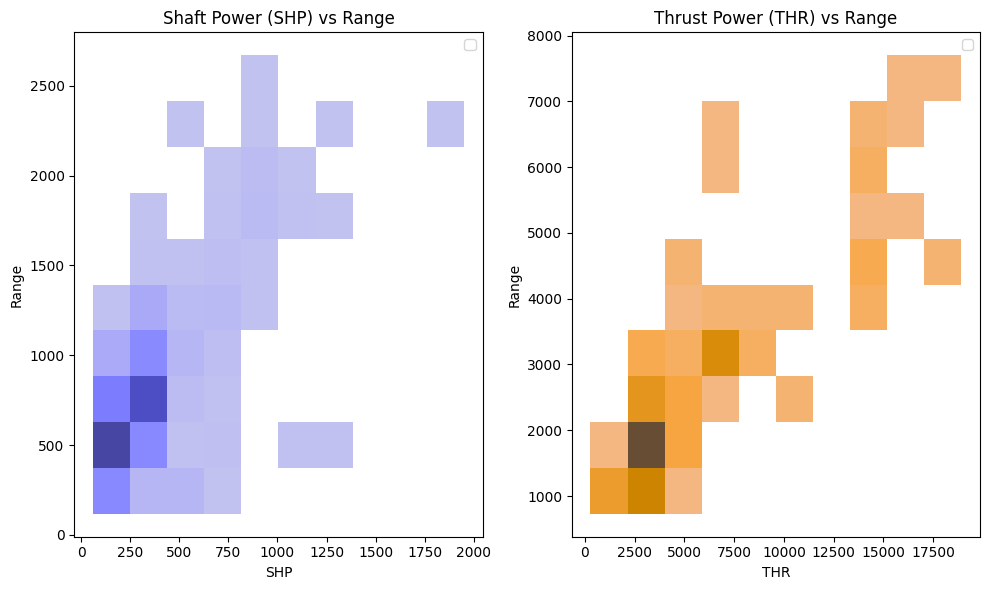

In [44]:
# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Subplot 1: SHP
plt.subplot(1, 2, 1)
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=10, kde=True, color='blue', label='SHP')
plt.title('Shaft Power (SHP) vs Range')
plt.xlabel('SHP')
plt.ylabel('Range')
plt.legend()

# Subplot 2: THR
plt.subplot(1, 2, 2)
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=10, kde=True, color='orange', label='THR')
plt.title('Thrust Power (THR) vs Range')
plt.xlabel('THR')
plt.ylabel('Range')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

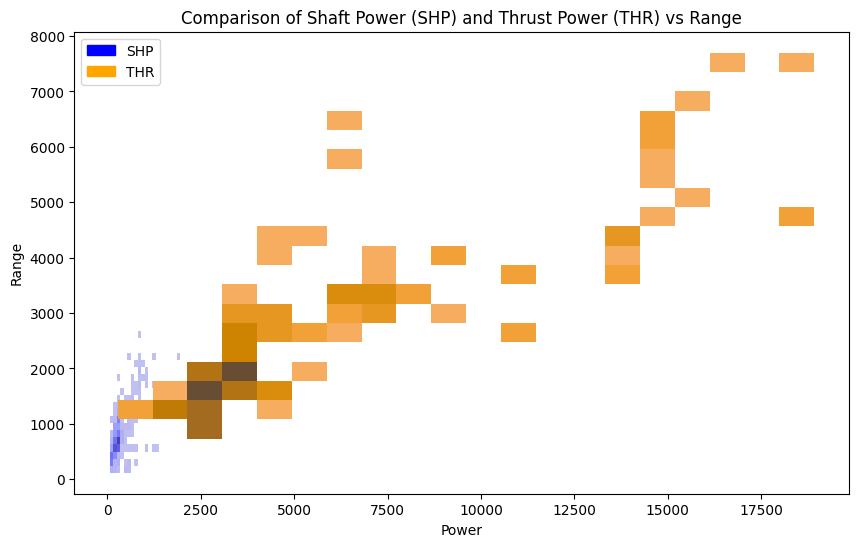

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create two separate histograms for 'SHP' and 'THR'
plt.figure(figsize=(10, 6))

# Histogram for 'SHP'
sns.histplot(data=aircraft_performance_dataset, x='SHP', y='Range', bins=20, kde=True, color='blue', label='SHP')

# Histogram for 'THR'
sns.histplot(data=aircraft_performance_dataset, x='THR', y='Range', bins=20, kde=True, color='orange', label='THR')

# Set plot title and labels
plt.title('Comparison of Shaft Power (SHP) and Thrust Power (THR) vs Range')
plt.xlabel('Power')
plt.ylabel('Range')

# Define custom legend
legend_labels = ['SHP', 'THR']
legend_colors = ['blue', 'orange']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add legend to the right-hand side with color labels
plt.legend(handles=legend_patches, loc='upper left')

# Show plot
plt.show()


<p style="color: #C837A0;"> 
We understand two things from graph above:

<ul style="color: #C837A0;">
    <li>Power ∝ Range. There are some cases where higher thrust power still leads to same range. However, it could be then due to other parameters. However, in majority cases, as thrust power increases, range increases</li>
    <li>Aircrafts that uses "Thrust" engine generally have a larger range</li>
</ul>

</p>

In [46]:
##Combined both SHP and THR into one column 'Power'
aircraft_performance_dataset['Power'] = aircraft_performance_dataset['SHP'].combine_first(aircraft_performance_dataset['THR'])
aircraft_performance_dataset.drop(['SHP', 'THR'], axis=1, inplace=True)
aircraft_performance_dataset = aircraft_performance_dataset[['Model', 'Company', 'Engine Type', 'Power', 'Length', 'Height', 'Wing Span', 'FW',	'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC',	'Range']]
aircraft_performance_dataset

,Model,Company,Engine Type,Power,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,500 A,Twin Commander A/C,Piston,260.0,35.083333,14.416667,49.416667,1045.2,4255.0,6250.0,198.0,190.0,22500.0,1400.0,957.0
856,500,Twin Commander A/C,Piston,250.0,35.083333,14.416667,49.000000,1045.2,3850.0,6000.0,190.0,178.0,22500.0,1400.0,957.0
857,520,Twin Commander A/C,Piston,260.0,35.416667,14.416667,44.083333,1005.0,3800.0,5500.0,183.0,171.0,24000.0,1700.0,1000.0
858,2180,Varga,Piston,180.0,21.166667,7.000000,30.000000,221.1,1175.0,1817.0,130.0,116.0,22000.0,1310.0,365.0


In [47]:
aircraft_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        860 non-null    object 
 1   Company      860 non-null    object 
 2   Engine Type  860 non-null    object 
 3   Power        860 non-null    float64
 4   Length       846 non-null    float64
 5   Height       843 non-null    float64
 6   Wing Span    856 non-null    float64
 7   FW           855 non-null    float64
 8   MEW          840 non-null    float64
 9   AUW          857 non-null    float64
 10  Vmax         817 non-null    float64
 11  Vcruise      838 non-null    float64
 12  Hmax         827 non-null    float64
 13  ROC          798 non-null    float64
 14  Range        815 non-null    float64
dtypes: float64(12), object(3)
memory usage: 100.9+ KB


In [48]:
aircraft_performance_dataset.head(5)

,Model,Company,Engine Type,Power,Length,Height,Wing Span,FW,MEW,AUW,Vmax,Vcruise,Hmax,ROC,Range
0,15 AC Sedan,Aeronca,Piston,145.0,25.250000,10.250000,37.416667,241.2,1180.0,2050.0,104.0,91.0,13000.0,450.0,370.0
1,11 CC Super Chief,Aeronca,Piston,85.0,20.583333,8.750000,36.083333,100.5,820.0,1350.0,89.0,83.0,12300.0,600.0,190.0
2,7 CCM Champ,Aeronca,Piston,90.0,21.416667,8.583333,35.000000,127.3,810.0,1300.0,90.0,78.0,16000.0,650.0,210.0
3,7 DC Champ,Aeronca,Piston,85.0,21.416667,8.583333,35.000000,127.3,800.0,1300.0,88.0,78.0,13000.0,620.0,210.0
4,7 AC Champ,Aeronca,Piston,65.0,21.416667,8.750000,35.000000,93.8,740.0,1220.0,83.0,74.0,12500.0,370.0,175.0


<p style="color: #C837A0;"> The provided dataset doesn't contain correct values. Some values are correct but even values on different websites differ. As a result, we can say that the values are correct. But we can use it as a test/simulation dataset, which we can just use for calculations or seeing how model will do prediction. We can also try calculating those values
</p>

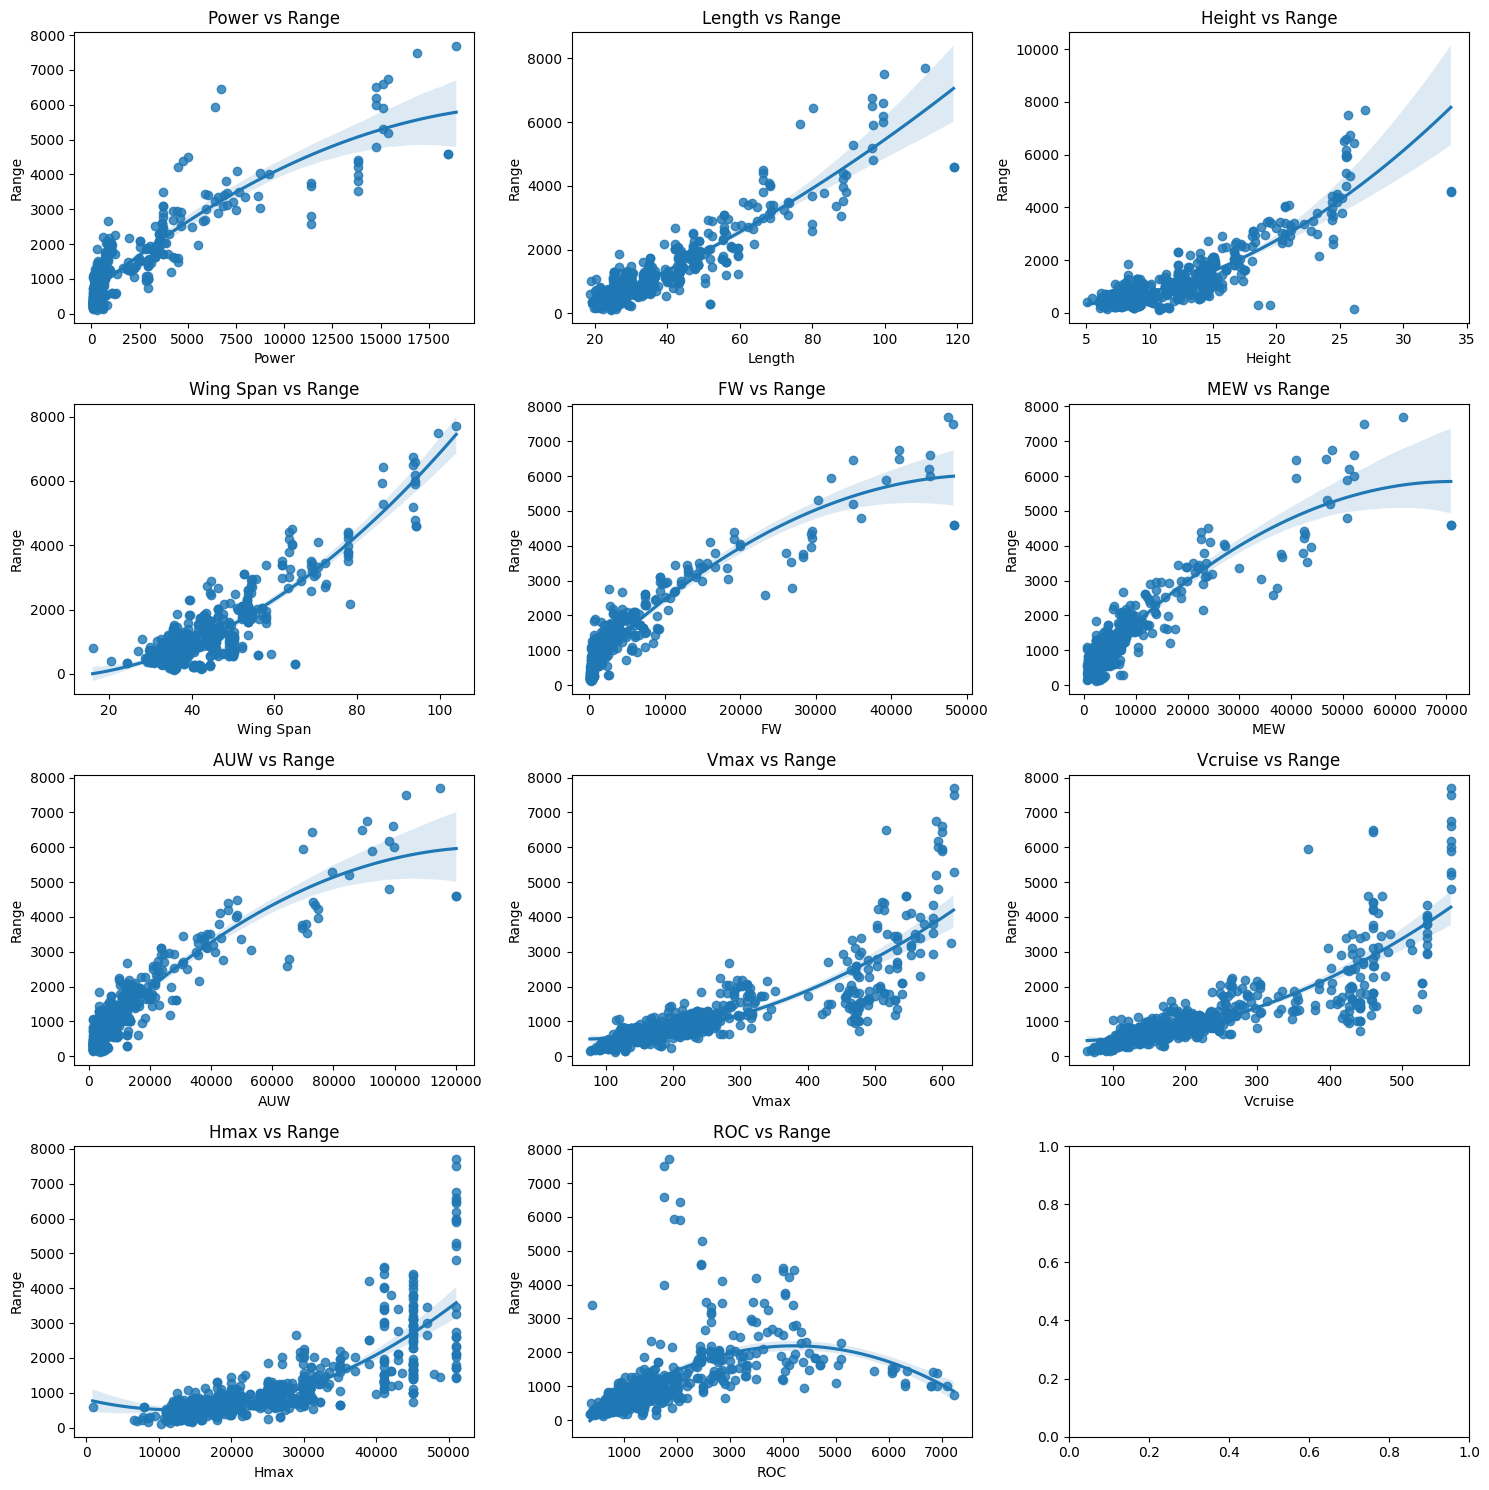

In [49]:
parameters = ['Power', 'Length', 'Height', 'Wing Span', 'FW', 'MEW', 'AUW', 'Vmax', 'Vcruise', 'Hmax', 'ROC']


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()


for i, param in enumerate(parameters):
    sns.regplot(data=aircraft_performance_dataset, x=param, y='Range', order=2, ax=axes[i])
    axes[i].set_title(f'{param} vs Range')

plt.tight_layout()
plt.show()

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Check how you can fill in these null values</li>
<li> Find what parameters you can calculate</li>
<li> Train model</li> 
</ul>

## About the dataset

- **Aircraft Information:** Model, Company, Engine Type, Multi Engine, TP Models
- **Physical Characteristics:** Length, Height, Wing Span, FW (Fuel Weight), MEW (Manufacturer's Empty Weight), AUW (All-Up Weight)
- **Performance Metrics:** Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll), Range

<br><br>

### Parameters Related to Aerodynamics, Flight Mechanics, or Others:

- **Aerodynamics:** Parameters such as Vmax (Max Speed), Vcruise (Recommended Cruise Speed), Vstall (Stall Speed), ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are directly related to aerodynamics and flight performance.
- **Flight Mechanics:** Parameters like ROC (Rate of Climb), ROC(One) (Rate of Climb with One Engine), Vlo (Takeoff Speed over 50ft), Slo (Takeoff Ground Run), VI (Landing over 50ft), SI (Landing Ground Roll) are related to flight mechanics as they describe the aircraft's behavior during takeoff, landing, and climb.

<br><br>

### Using Parameters to Calculate Different Parameters:
- **Climb Gradient:** Calculate the aircraft's climb gradient based on its rate of climb and ground speed.
- **Lift-to-Drag Ratio (L/D):** Estimate the lift-to-drag ratio of the aircraft based on its aerodynamic parameters such as wing span and drag coefficient.
- **Breguets Range Equation:**

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9> **Investigating Aircraft Weight and Balance Metrics**</font>
<p> The dataset is taken from the following link: <a href="https://www.kaggle.com/datasets/aadharshviswanath/investigating-aircraft-weight-and-balance-metrics">Aircraft Weight & Balance Metrics</a>

This dataset offers a comprehensive compilation of weight and balance information for a diverse array of aircraft models that are extensively employed in aviation operations. 

## <font style="color: #CE33FF;"> Parameters: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Aircraft Model:</span></strong> Airplane's name.</li>
    <li><strong><span style="color: #374DC8;">Empty Weight (kg):</span></strong> The weight of the aircraft when empty, including the airframe, engines, avionics, and other essential equipment.</li>
    <li><strong><span style="color: #374DC8;">Maximum Takeoff Weight (kg):</span></strong> The maximum weight at which the aircraft is certified to take off, including passengers, cargo, and fuel.</li>
    <li><strong><span style="color: #374DC8;">Maximum Landing Weight (kg)</span></strong> The maximum weight at which the aircraft is certified to land safely.</li>
    <li><strong><span style="color: #374DC8;">Center of Gravity Limits:</span></strong> The range within which the center of gravity of the aircraft must be located for safe flight, expressed as a percentage of the Mean Aerodynamic Chord (MAC).</li>
    <li><strong><span style="color: #374DC8;">Wing Loading (kg/m²):</span></strong> The load per unit area of the wing, is calculated by dividing the maximum takeoff weight by the wing area. </li>
    <li><strong><span style="color: #374DC8;">Tail Loading (kg/m²)</span></strong> Similar to wing loading, but for the tail section of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Fuel Capacity (liters)</span></strong> The maximum amount of fuel the aircraft can carry, influencing its range and endurance.</li>
    <li><strong><span style="color: #374DC8;">Number of Passengers:</span></strong> The maximum number of passengers the aircraft can accommodate.</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity (kg):</span></strong> The maximum weight of cargo or baggage the aircraft can carry.</li> 
    <li><strong><span style="color: #374DC8;">Maximum Altitude (ft)</span></strong> The maximum altitude at which the aircraft can safely operate.</li>
    <li><strong><span style="color: #374DC8;">Maximum Speed (knots):</span></strong> The maximum speed the aircraft can reach, typically measured in knots (nautical miles per hour).</li>
    <li><strong><span style="color: #374DC8;">Engine Type:</span></strong> The type of engines used on the aircraft, such as turbofan or turboprop.</li>
    <li><strong><span style="color: #374DC8;">Fuselage Length (m):</span></strong> The length of the aircraft's fuselage, which may impact aerodynamics and weight distribution.</li>
</ul>

In [2]:
airplane_weight_dataset = pd.read_csv('Datasets/Investigating Aircraft Weight and Balance Metrics/Investigating Aircraft Weight and Balance Metrics.csv')
airplane_weight_dataset = airplane_weight_dataset.drop(['Unnamed: 0'], axis=1)
airplane_weight_dataset

,Aircraft Model,Empty Weight (kg),Maximum Takeoff Weight (kg),Maximum Landing Weight (kg),Center of Gravity Limits,Wing Loading (kg/m²),Tail Loading (kg/m²),Fuel Capacity (liters),Number of Passengers,Cargo Capacity (kg),Maximum Altitude (ft),Maximum Speed (knots),Engine Type,Fuselage Length (m)
0,Airbus A320,149968.187455,2.795251e+05,255896.490294,25%-35% of MAC,818.558281,124.788364,52538.236167,472,80061.732289,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,143703.314584,15%-30% of MAC,366.423230,111.743182,298000.265987,257,27118.725192,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,270662.904304,20%-35% of MAC,829.145903,138.672695,176299.254601,172,1002.209110,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,183594.487162,15%-30% of MAC,290.845909,169.249463,51211.630194,444,75726.083545,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,233683.883944,20%-35% of MAC,509.848919,32.282885,494662.501258,55,45268.322065,30982,663,Piston,80.394753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,231639.994390,3.836723e+05,342423.233107,20%-35% of MAC,386.181592,75.389841,343170.196838,421,10838.506279,35895,557,Turboprop,55.817305
24996,Bombardier Global 6000,221255.359587,1.074710e+06,276781.653473,15%-30% of MAC,367.397978,199.633207,311523.190561,462,58961.668447,25187,588,Turbofan,15.447788
24997,Gulfstream G650,34559.592817,1.272493e+05,125404.410579,20%-40% of MAC,517.456695,147.840228,97968.104728,289,60801.747075,36838,441,Turboprop,58.920670
24998,Beechcraft King Air 350,94871.536439,2.573037e+05,191036.131733,20%-35% of MAC,782.307394,120.828459,39422.458907,421,35974.887809,52334,673,Turboprop,69.698684


In [3]:
airplane_weight_dataset = airplane_weight_dataset.rename(columns={'Aircraft Model': 'Aircraft_Model', 'Empty Weight (kg)': 'Empty_Weight', 'Max Gross Weight (kg)': 'Max_Gross_Weight', 'Maximum Takeoff Weight (kg)': 'Max_Takeoff_Weight',
                                                                  'Maximum Landing Weight (kg)': 'Max_Landing_Weight', 'Center of Gravity Limits': 'Center_of_Gravity_Limits', 'Wing Loading (kg/m²)': 'Wing_Loading',
                                                                  'Tail Loading (kg/m²)': 'Tail_Loading', 'Fuel Capacity (liters)': 'Fuel_Capacity', 'Number of Passengers': 'Number_of_Passengers', 
                                                                  'Cargo Capacity (kg)': 'Cargo_Capacity', 'Maximum Altitude (ft)': 'Max_Altitude', 
                                                                  'Maximum Speed (knots)': 'Max_Speed', 'Engine Type': 'Engine_Type', 'Fuselage Length (m)': 'Fuselage_Length'})
airplane_weight_dataset = airplane_weight_dataset.drop(['Number_of_Passengers', 'Cargo_Capacity'], axis=1)
airplane_weight_dataset

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,255896.490294,25%-35% of MAC,818.558281,124.788364,52538.236167,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,143703.314584,15%-30% of MAC,366.423230,111.743182,298000.265987,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,270662.904304,20%-35% of MAC,829.145903,138.672695,176299.254601,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,183594.487162,15%-30% of MAC,290.845909,169.249463,51211.630194,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,233683.883944,20%-35% of MAC,509.848919,32.282885,494662.501258,30982,663,Piston,80.394753
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,231639.994390,3.836723e+05,342423.233107,20%-35% of MAC,386.181592,75.389841,343170.196838,35895,557,Turboprop,55.817305
24996,Bombardier Global 6000,221255.359587,1.074710e+06,276781.653473,15%-30% of MAC,367.397978,199.633207,311523.190561,25187,588,Turbofan,15.447788
24997,Gulfstream G650,34559.592817,1.272493e+05,125404.410579,20%-40% of MAC,517.456695,147.840228,97968.104728,36838,441,Turboprop,58.920670
24998,Beechcraft King Air 350,94871.536439,2.573037e+05,191036.131733,20%-35% of MAC,782.307394,120.828459,39422.458907,52334,673,Turboprop,69.698684


In [4]:
airplane_weight_dataset.head(10)

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,2.558965e+05,25%-35% of MAC,818.558281,124.788364,52538.236167,44470,658,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,1.437033e+05,15%-30% of MAC,366.423230,111.743182,298000.265987,31739,495,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,2.706629e+05,20%-35% of MAC,829.145903,138.672695,176299.254601,24398,585,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,1.835945e+05,15%-30% of MAC,290.845909,169.249463,51211.630194,26793,632,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,2.336839e+05,20%-35% of MAC,509.848919,32.282885,494662.501258,30982,663,Piston,80.394753
5,Embraer E190,236729.193146,1.138953e+06,8.542982e+05,25%-35% of MAC,543.291091,20.334139,357994.599979,55066,554,Turbofan,69.438743
6,Cessna 172,297983.775694,1.272807e+06,1.126507e+06,20%-35% of MAC,733.617455,112.197692,222825.243817,21373,516,Piston,74.324203
7,Boeing 737-800,280603.816883,3.022066e+05,2.937549e+05,25%-35% of MAC,440.424291,80.249872,275771.977311,30947,608,Turbofan,44.526518
8,Boeing 747-8,214038.935441,9.520979e+05,4.048373e+05,20%-40% of MAC,582.397343,26.221354,308066.435003,39719,587,Turbofan,94.068385
9,Airbus A320,154058.132387,7.554157e+05,5.994054e+05,20%-40% of MAC,471.443155,181.546633,95243.904563,46354,692,Piston,64.784785


In [5]:
airplane_weight_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Aircraft_Model            25000 non-null  object 
 1   Empty_Weight              25000 non-null  float64
 2   Max_Takeoff_Weight        25000 non-null  float64
 3   Max_Landing_Weight        25000 non-null  float64
 4   Center_of_Gravity_Limits  25000 non-null  object 
 5   Wing_Loading              25000 non-null  float64
 6   Tail_Loading              25000 non-null  float64
 7   Fuel_Capacity             25000 non-null  float64
 8   Max_Altitude              25000 non-null  int64  
 9   Max_Speed                 25000 non-null  int64  
 10  Engine_Type               25000 non-null  object 
 11  Fuselage_Length           25000 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
airplane_weight_dataset = convert_loading(airplane_weight_dataset, 'Wing_Loading', 'Tail_Loading', kg_m2=True)
airplane_weight_dataset = convert_length_to_meters(airplane_weight_dataset, 'Max_Altitude', ft=True)
airplane_weight_dataset = convert_speed(airplane_weight_dataset, 'Max_Speed', knots=True)
airplane_weight_dataset

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,255896.490294,25%-35% of MAC,8027.314571,1223.755807,52538.236167,13554.4560,1218.616,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,143703.314584,15%-30% of MAC,3593.384370,1095.826277,298000.265987,9674.0472,916.740,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,270662.904304,20%-35% of MAC,8131.143666,1359.914587,176299.254601,7436.5104,1083.420,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,183594.487162,15%-30% of MAC,2852.224033,1659.770249,51211.630194,8166.5064,1170.464,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,233683.883944,20%-35% of MAC,4999.909906,316.586951,494662.501258,9443.3136,1227.876,Piston,80.394753
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Bombardier Global 6000,231639.994390,3.836723e+05,342423.233107,20%-35% of MAC,3787.147710,739.321787,343170.196838,10940.7960,1031.564,Turboprop,55.817305
24996,Bombardier Global 6000,221255.359587,1.074710e+06,276781.653473,15%-30% of MAC,3602.943378,1957.732991,311523.190561,7676.9976,1088.976,Turbofan,15.447788
24997,Gulfstream G650,34559.592817,1.272493e+05,125404.410579,20%-40% of MAC,5074.516702,1449.817368,97968.104728,11228.2224,816.732,Turboprop,58.920670
24998,Beechcraft King Air 350,94871.536439,2.573037e+05,191036.131733,20%-35% of MAC,7671.814807,1184.922409,39422.458907,15951.4032,1246.396,Turboprop,69.698684


In [7]:
airplane_weight_dataset.head(10)

,Aircraft_Model,Empty_Weight,Max_Takeoff_Weight,Max_Landing_Weight,Center_of_Gravity_Limits,Wing_Loading,Tail_Loading,Fuel_Capacity,Max_Altitude,Max_Speed,Engine_Type,Fuselage_Length
0,Airbus A320,149968.187455,2.795251e+05,2.558965e+05,25%-35% of MAC,8027.314571,1223.755807,52538.236167,13554.4560,1218.616,Turbofan,41.726817
1,Boeing 777,140855.879891,1.450552e+05,1.437033e+05,15%-30% of MAC,3593.384370,1095.826277,298000.265987,9674.0472,916.740,Turbofan,54.402799
2,Airbus A320,151024.598908,5.343439e+05,2.706629e+05,20%-35% of MAC,8131.143666,1359.914587,176299.254601,7436.5104,1083.420,Turboprop,28.864086
3,Airbus A320,180889.454772,8.151858e+05,1.835945e+05,15%-30% of MAC,2852.224033,1659.770249,51211.630194,8166.5064,1170.464,Turboprop,46.111611
4,Embraer E190,113855.173286,4.390943e+05,2.336839e+05,20%-35% of MAC,4999.909906,316.586951,494662.501258,9443.3136,1227.876,Piston,80.394753
5,Embraer E190,236729.193146,1.138953e+06,8.542982e+05,25%-35% of MAC,5327.865580,199.409781,357994.599979,16784.1168,1026.008,Turbofan,69.438743
6,Cessna 172,297983.775694,1.272807e+06,1.126507e+06,20%-35% of MAC,7194.329616,1100.283494,222825.243817,6514.4904,955.632,Piston,74.324203
7,Boeing 737-800,280603.816883,3.022066e+05,2.937549e+05,25%-35% of MAC,4319.086870,786.982408,275771.977311,9432.6456,1126.016,Turbofan,44.526518
8,Boeing 747-8,214038.935441,9.520979e+05,4.048373e+05,20%-40% of MAC,5711.366904,257.143643,308066.435003,12106.3512,1087.124,Turbofan,94.068385
9,Airbus A320,154058.132387,7.554157e+05,5.994054e+05,20%-40% of MAC,4623.278014,1780.364288,95243.904563,14128.6992,1281.584,Piston,64.784785


<p style="color: #C837A0;"> The parameters provided in the dataset do not align with the original values provided in aircraft booklets or wikipedia. Hence, I am not sure how this data was created. I emailed the guy, and currently waiting for his reply</p>

In [8]:
aircraft_duplicates = ps.sqldf(""" SELECT Aircraft_Model, COUNT(*) as total_reoccurences
                    from  airplane_weight_dataset
                    GROUP BY Aircraft_Model
                    ORDER BY COUNT(*) DESC """)
aircraft_duplicates

,Aircraft_Model,total_reoccurences
0,Beechcraft King Air 350,2568
1,Boeing 747-8,2537
2,Airbus A320,2533
3,Airbus A380,2513
4,Boeing 737-800,2508
5,Boeing 777,2499
6,Gulfstream G650,2494
7,Cessna 172,2457
8,Embraer E190,2456
9,Bombardier Global 6000,2435


In [9]:
print(f"Sum of total duplicates: {aircraft_duplicates['total_reoccurences'].sum()}")

Sum of total duplicates: 25000


In [10]:
unique_aircrafts = ps.sqldf(""" SELECT COUNT(DISTINCT Aircraft_Model) as unique_aircrafts from airplane_weight_dataset""")
unique_aircrafts

,unique_aircrafts
0,10


<p style="color: #C837A0;"> After examining the dataset, it's apparent that there's a recurring pattern involving only 10 specific aircraft. Consequently, the results derived from this dataset may not accurately reflect the original parameters outlined in the aircraft booklet. It seems that the dataset primarily consists of repeated information for these 10 aircraft, resembling simulation data.</p>

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
<li> Remove the extra column (✅)</li>
<li> Check data types of parameters (✅)</li>
<li> Make values in standard units (✅)</li>
<li> Check if the values are correct (✅)</li>
<li> Check if there are any duplicate aircraft models. If yes then why? (✅)</li>
<li> Check if for some aircrafts, you can combine the results with other table. For example, if you can combine it with "Turbo Fuel Consumption" or "Top 60 Aircrafts" table (❌)</li>
<li> Check the parameters you can calculate using these parameters(❌)</li>
</ul>

## About the dataset
The parameters could be divided into three types:

- **Aerodynamics**
    - Wing Loading (kg/m²)
    - Tail Loading (kg/m²)
- **Aircraft Specification**        
    - Empty Weight (kg)
    - Maximum Takeoff Weight (kg)
    - Maximum Landing Weight (kg)
    - Center of Gravity Limits (% of Mean Aerodynamic Chord)
    - Fuel Capacity (liters)
    - Number of Passengers
    - Cargo Capacity (kg)
    - Engine Type
    - Fuselage Length (m)<br>
- **Performance Characteristics:**
    - Range
    - Endurance
    - Maximum Altitude (ft)
    - Maximum Speed (knots)


<br><br>

Using these sub-parameters, you can calculate or estimate the main parameters as follows:

- **Range:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Endurance:** Calculate based on fuel capacity, fuel consumption rate, and cruise speed.
- **Payload Capacity:** Calculate based on maximum takeoff weight, empty weight, cargo capacity, and number of passengers.
- **Maximum Altitude:** Estimate based on engine type, wing loading, tail loading, and maximum takeoff weight.
- **Maximum Speed:** Estimate based on engine type, maximum takeoff weight, fuselage length, and wing loading.

--------------------------------------------------------------

--------------------------------------------------------------

--------------------------------------------------------------

# <font color=33FFF9>**The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft**</font>

<p> The dataset is taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/TextHirsch.pdf">The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft</a>

Request to use the dataset has been granted. 

## <font style="color: #CE33FF;"> Parameters: </font>


<ul>
    <li><strong><span style="color: #374DC8;">Manufacturer:</span></strong> The company that manufactures the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Aircraft type:</span></strong> The specific type or model designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Total number of operating A/C:</span></strong> The total number of aircraft of this type currently in operation.</li>
    <li><strong><span style="color: #374DC8;">Option/Variant:</span></strong> Any optional configurations or variants of the aircraft model.</li>
    <li><strong><span style="color: #374DC8;">Engine:</span></strong> The type or model of engine(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">No. of Engines:</span></strong> The total number of engines installed on the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> The specific model name or designation of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max. Rated Takeoff Thrust (T_TO):</span></strong> The maximum rated thrust produced by the engines during takeoff, typically measured in kilonewtons (kN).</li>
    <li><strong><span style="color: #374DC8;">Equivalent Power (P):</span></strong> The equivalent power of the engines, typically measured in kilowatts (kW).</li>
    <li><strong><span style="color: #374DC8;">Propeller:</span></strong> Information about the propeller(s) used in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Cabin Length (l_CABIN):</span></strong> The length of the cabin, which is the passenger compartment of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Height of Cabin (h_CABIN):</span></strong> The maximum height of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Max. Width of Cabin (d_F,I):</span></strong> The maximum width of the cabin, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Passenger Compartment Volume (V_CABIN):</span></strong> The volume of the passenger compartment or cabin, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Height (h_F):</span></strong> The height of the fuselage, which is the main body of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Fuselage Width (w_F):</span></strong> The width of the fuselage, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Total Length of Aircraft (l_A/C):</span></strong> The total length of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wingspan (b_W):</span></strong> The wingspan of the aircraft, which is the distance from one wingtip to the other, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Height of Aircraft (h_A/C):</span></strong> The height of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Landing Gear Track (l_T):</span></strong> The track width of the landing gear, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wheelbase (l_WB):</span></strong> The wheelbase of the aircraft, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Wing Area (S_W):</span></strong> The total wing area of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Wing (λ_W):</span></strong> The taper ratio of the wings, which is the ratio of the root chord to the tip chord.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Wing (φ_25,W):</span></strong> The 1/4 chord sweep of the wings, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Vertical Tail Area (S_V):</span></strong> The total area of the vertical tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Height of Vertical Tail (b_V):</span></strong> The height of the vertical tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper ratio of Vertical Tail (λ_V):</span></strong> The taper ratio of the vertical tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Vertical Tail (φ_25,V):</span></strong> The 1/4 chord sweep of the vertical tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Horizontal Tail Area (S_H):</span></strong> The total area of the horizontal tail of the aircraft, typically measured in square meters (m²).</li>
    <li><strong><span style="color: #374DC8;">Span of Horizontal Tail (b_H):</span></strong> The span of the horizontal tail, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Taper Ratio of Horizontal Tail (λ_H):</span></strong> The taper ratio of the horizontal tail.</li>
    <li><strong><span style="color: #374DC8;">1/4 Chord Sweep of Horizontal Tail (φ_25,H):</span></strong> The 1/4 chord sweep of the horizontal tail, typically measured in degrees (°).</li>
    <li><strong><span style="color: #374DC8;">Cruise V_MO (kt):</span></strong> The cruise speed limit in knots (kt).</li>
    <li><strong><span style="color: #374DC8;">Cruise M_MO (Mach):</span></strong> The cruise speed limit in Mach.</li>
    <li><strong><span style="color: #374DC8;">Cruise Speed (M_CR):</span></strong> The cruise speed of the aircraft, typically measured in Mach.</li>
    <li><strong><span style="color: #374DC8;">Max. Certified Flight Level (h_MCR):</span></strong> The maximum certified flight level, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Cruise Altitude (h_CR):</span></strong> The cruise altitude of the aircraft, typically measured in flight levels (FL).</li>
    <li><strong><span style="color: #374DC8;">Fuel Unusable Fuel (l):</span></strong> The amount of fuel considered unusable, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Optional Fuel (l):</span></strong> The amount of optional fuel that can be carried, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Max usable fuel (l):</span></strong> The maximum usable fuel capacity, typically measured in liters (l).</li>
    <li><strong><span style="color: #374DC8;">Range Max. Payload (R_MPL) (nm):</span></strong> The maximum range with maximum payload, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Pax (R_M.pax) (nm):</span></strong> The maximum range with maximum passengers, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Max. Range (R_PLMR) (nm):</span></strong> The maximum range of the aircraft, typically measured in nautical miles (nm).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Ramp (m_MR) (MRM) (kg):</span></strong> The maximum ramp weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</span></strong> The maximum take-off weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Landing (m_ML) (MLM) (kg):</span></strong> The maximum landing weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</span></strong> The maximum zero fuel weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</span></strong> The operating empty weight of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Max. Payload (m_MPL) (MPL) (kg):</span></strong> The maximum payload capacity of the aircraft, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Mass: Payload at Max. Range (m_PLMR) (kg):</span></strong> The payload capacity at maximum range, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Cargo Volume (V_CARGO) (m³):</span></strong> The volume of cargo space available, typically measured in cubic meters (m³).</li>
    <li><strong><span style="color: #374DC8;">Cargo Capacity:</span></strong> Information about the cargo capacity of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Max Pallet Underfloor:</span></strong> Maximum pallet capacity under the floor of the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Seats Max:</span></strong> Maximum number of seats available in the aircraft.</li>
    <li><strong><span style="color: #374DC8;">Std. Layout:</span></strong> Information about the standard layout of seats in the aircraft.</li>
</ul>


### <font style="color: #CE33FF;"> Aerodynamics: </font>

<ul>
    <li><strong>Wingspan (b_W):</strong> Main parameter. Used to calculate wing aspect ratio and lift distribution.</li>
    <li><strong>Wing Area (S_W):</strong> Main parameter. Used to calculate wing loading and lift coefficient.
        <ul>
            <li><strong>Taper ratio of Wing (λ_W):</strong> Sub-parameter. Affects lift distribution and aerodynamic efficiency.</li>
            <li><strong>1/4 Chord Sweep of Wing (φ_25,W):</strong> Sub-parameter. Affects aerodynamic performance and stability.</li>
        </ul>
    </li>
    <li><strong>Vertical Tail Area (S_V):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper ratio of Vertical Tail (λ_V):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Vertical Tail (φ_25,V):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
    <li><strong>Horizontal Tail Area (S_H):</strong> Main parameter. Used to calculate tail volume coefficient and stability.
        <ul>
            <li><strong>Taper Ratio of Horizontal Tail (λ_H):</strong> Sub-parameter. Affects tail effectiveness and stability.</li>
            <li><strong>1/4 Chord Sweep of Horizontal Tail (φ_25,H):</strong> Sub-parameter. Affects tail performance and stability.</li>
        </ul>
    </li>
</ul>


### <font style="color: #CE33FF;"> Flight Mechanics: </font>
<ul>
    <li><strong>Max. Rated Takeoff Thrust (T_TO):</strong> Main parameter. Used for thrust-to-weight ratio and takeoff performance.</li>
    <li><strong>Equivalent Power (P):</strong> Main parameter. Used for power loading and climb performance.</li>
    <li><strong>Max. Certified Flight Level (h_MCR):</strong> Main parameter. Defines maximum flight altitude.</li>
    <li><strong>Cruise Speed (M_CR):</strong> Main parameter. Defines cruising speed.</li>
    <li><strong>Cruise Altitude (h_CR):</strong> Main parameter. Defines cruising altitude.</li>
    <li><strong>Mass: Max. Take-Off (m_MTO) (MTOM) (kg):</strong> Main parameter. Defines maximum takeoff weight.</li>
    <li><strong>Mass: Max. Landing (m_ML) (MLM) (kg):</strong> Main parameter. Defines maximum landing weight.</li>
    <li><strong>Mass: Max. Zero Fuel (m_MZF) (MZFM) (kg):</strong> Main parameter. Defines maximum zero fuel weight.</li>
    <li><strong>Mass: Operating Empty (m_OE) (OEM) (MZFM-MPL) (kg):</strong> Main parameter. Defines operating empty weight.</li>
    <li><strong>Mass: Max. Payload (m_MPL) (MPL) (kg):</strong> Main parameter. Defines maximum payload weight.</li>
    <li><strong>Range Max. Payload (R_MPL) (nm):</strong> Main parameter. Defines maximum range with payload.</li>
</ul>

### <font style="color: #CE33FF;"> Other Parameters: </font>
<ul>
    <li><strong>Manufacturer:</strong> Identification parameter.</li>
    <li><strong>Aircraft type:</strong> Identification parameter.</li>
    <li><strong>Total number of operating A/C:</strong> Operational parameter.</li>
    <li><strong>Option/Variant:</strong> Configuration parameter.</li>
    <li><strong>Engine:</strong> Identification parameter.</li>
    <li><strong>No. of Engines:</strong> Configuration parameter.</li>
    <li><strong>Model:</strong> Identification parameter.</li>
    <li><strong>Propeller:</strong> Configuration parameter.</li>
    <li><strong>Cabin Length (l_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Height of Cabin (h_CABIN):</strong> Interior parameter.</li>
    <li><strong>Max. Width of Cabin (d_F,I):</strong> Interior parameter.</li>
    <li><strong>Passenger Compartment Volume (V_CABIN):</strong> Interior parameter.</li>
    <li><strong>Fuselage Height (h_F):</strong> Exterior parameter.</li>
    <li><strong>Fuselage Width (w_F):</strong> Exterior parameter.</li>
    <li><strong>Total Length of Aircraft (l_A/C):</strong> Exterior parameter.</li>
    <li><strong>Landing Gear Track (l_T):</strong> Landing gear parameter.</li>
    <li><strong>Wheelbase (l_WB):</strong> Landing gear parameter.</li>
    <li><strong>Fuel Unusable Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Optional Fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max usable fuel (l):</strong> Fuel parameter.</li>
    <li><strong>Max. Pax (R_M.pax) (nm):</strong> Passenger parameter.</li>
    <li><strong>Max. Range (R_PLMR) (nm):</strong> Range parameter.</li>
    <li><strong>Mass: Max. Ramp (m_MR) (MRM) (kg):</strong> Mass parameter.</li>
    <li><strong>Mass: Payload at Max. Range (m_PLMR) (kg):</strong> Mass parameter.</li>
    <li><strong>Cargo Volume (V_CARGO) (m³):</strong> Cargo parameter.</li>
    <li><strong>Cargo Capacity:</strong> Cargo parameter.</li>
    <li><strong>Max Pallet Underfloor:</strong> Cargo parameter.</li>
    <li><strong>Seats Max:</strong> Passenger parameter.</li>
    <li><strong>Std. Layout:</strong> Passenger parameter.</li>
</ul>


## <font style="color: #F4AC12;"> <strong>Data Cleanup </strong></font>

In [3]:
para_for_60_aircrafts = pd.read_excel('Datasets/The 50 Most Important Parameters of the 60 Most Used Passenger Aircraft_Dataset/Aircraft_Database.xlsx')
para_for_60_aircrafts = para_for_60_aircrafts.drop(['A/C'], axis=1)
para_for_60_aircrafts.drop(para_for_60_aircrafts.tail(3).index, inplace = True)
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

,Aircraft type,A220-300,A319ceo,A319neo,A320ceo,A320neo,A321ceo,A321neo,A330-200,A330-300,...,175,190,195,Merlin,Metro,Fokker 50,Fokker 100,Saab 340,Superjet 100,Twin Otter
1,Total number of operating A/C,72,1243,0,4132,1009,1591,355,502,707,...,624,501,161,220*,220*,86,109,188,131,315
2,Option/Variant,-,-,-,-,-,-,-,A330-203,A330-303,...,LR,-,AR,SA227-T,SA226-TC,F27 Mark 050,F28 Mark 0100,340B,SSJ100/95B,DHC-6 400
3,No. of Engines,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,Model,PW1521G,CFM56-5A5,LEAP-1A26,CFM56-5B4,LEAP-1A29,CFM56-5B1,LEAP-1A32,CF6-80E1A3,CF6-80E1A3,...,CF34-8E5,CF34-10E7,CF34-10E7,331-3U-303G,331-3UW-303G,PW125B,Tay 650-15,GE CT7-9B,SaM146,PT6A-34
5,"Max. Rated Takeoff Thrust, T_TO [kN]",97.73,104.53,120.64,120.1,130.29,133.44,143.05,304.84,304.84,...,64.54,90.57,90.57,-,-,-,67.17,-,71.6,-
6,"Equivalent Power, P [kW]",-,-,-,-,-,-,-,-,-,...,-,-,-,618,701,1864,-,1395,-,462
7,Propeller,-,-,-,-,-,-,-,-,-,...,-,-,-,HC-B3TN-5( )/T1028HDB-4R,HC-B3TN-5( )/T10282HB,R352/6-123-F/1,-,14 RF-19,-,HC-B3TN-3D/T10282N
8,"Length, l_CABIN [m]",27.5,23.78,23.78,27.51,27.51,34.44,34.44,45,50.36,...,21.34,25.91,32.05,3.25,7.75,NaN,21.19,10.4,20.42,5.64
9,"Max. Height, h_CABIN [m]",2.13,2.25,2.25,2.25,2.25,2.25,2.25,2.4,2.4,...,2,2,2,1.5,1.45,NaN,2.01,1.8,2.12,1.5
10,"Max. Width, d_F,I [m]",3.28,3.7,3.7,3.7,3.7,3.7,3.7,5.26,5.26,...,2.74,2.74,2.74,1.57,1.57,2.5,3.1,2.2,3.24,1.61


In [4]:
print(f"Shape: {para_for_60_aircrafts.shape}")
para_for_60_aircrafts.info()

Shape: (52, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Aircraft type    52 non-null     object
 1   A220-300         49 non-null     object
 2   A319ceo          47 non-null     object
 3   A319neo          47 non-null     object
 4   A320ceo          47 non-null     object
 5   A320neo          47 non-null     object
 6   A321ceo          47 non-null     object
 7   A321neo          47 non-null     object
 8   A330-200         47 non-null     object
 9   A330-300         47 non-null     object
 10  A330-900         47 non-null     object
 11  A350-900         46 non-null     object
 12  A350-1000        45 non-null     object
 13  A380             51 non-null     object
 14  AN-24            41 non-null     object
 15  ATR 42           38 non-null     object
 16  ATR 72           42 non-null     object
 17  Jetstream 31/32  45 n

In [5]:
para_for_60_aircrafts = para_for_60_aircrafts.transpose()
para_for_60_aircrafts.columns = para_for_60_aircrafts.iloc[0]
para_for_60_aircrafts = para_for_60_aircrafts[1:]
para_for_60_aircrafts

Aircraft type,Total number of operating A/C,Option/Variant,No. of Engines,Model,"Max. Rated Takeoff Thrust, T_TO [kN]","Equivalent Power, P [kW]",Propeller,"Length, l_CABIN [m]","Max. Height, h_CABIN [m]","Max. Width, d_F,I [m]",...,"Max. Landing, m_ML (MLM) [kg]","Max. Zero Fuel, m_MZF (MZFM) [kg]","Operating Empty, m_OE (OEM) (MZFM-MPL) [kg]","Max. Payload, m_MPL (MPL) [kg]","Payload at Max. Range, m_PLMR [kg]","Volume, V_CARGO [m³]",Cargo Capacity,Max. Pallet Underfloor,"Max. Seats, n_M,SEAT","Std. Layout, n_SEAT"
0,,,,,,,,,,,,,,,,,,,,,
A220-300,72,-,2,PW1521G,97.73,-,-,27.5,2.13,3.28,...,58800,55800,43500,12300,6350,27.46,-,-,149,140
A319ceo,1243,-,2,CFM56-5A5,104.53,-,-,23.78,2.25,3.7,...,62500,58500,35400,23100,9800,27.66,4 ULD,-,160,156
A319neo,0,-,2,LEAP-1A26,120.64,-,-,23.78,2.25,3.7,...,63900,60300,39600,20700,11000,27.66,4 ULD,-,160,156
A320ceo,4132,-,2,CFM56-5B4,120.1,-,-,27.51,2.25,3.7,...,66000,62500,43500,19000,13000,37.42,7 LD3-45W,7,180,170
A320neo,1009,-,2,LEAP-1A29,130.29,-,-,27.51,2.25,3.7,...,67400,64300,45800,18500,12000,37.42,7 LD3-45W,7,194,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,86,F27 Mark 050,2,PW125B,-,1864,R352/6-123-F/1,NaN,NaN,2.5,...,20030,18900,13400,5500,3300,5.51,-,-,62,50
Fokker 100,109,F28 Mark 0100,2,Tay 650-15,67.17,-,-,21.19,2.01,3.1,...,39915,36740,24747,11993,9200,18.02,-,-,109,100
Saab 340,188,340B,2,GE CT7-9B,-,1395,14 RF-19,10.4,1.8,2.2,...,12930,12020,8620,3400,2450,11,-,-,37,34


In [6]:
# Create a dictionary to map the old column names to the new ones with dashes instead of spaces

column_mapping = {
    'Total number of operating A/C': 'Operating_Aircraft_Count',
    'Option/Variant': 'Option_Variant',
    'No. of Engines': 'Total_Engines',
    'Model': 'Engine_Model',
    'Max. Rated Takeoff Thrust, T_TO [kN]': 'Max_Takeoff_Thrust',
    'Equivalent Power, P [kW]': 'Equivalent_Power',
    'Propeller': 'Propeller_Type',
    'Length, l_CABIN [m]': 'Cabin_Length',
    'Max. Height, h_CABIN [m]': 'Max_Cabin_Height',
    'Max. Width, d_F,I [m]': 'Max_Cabin_Width',
    'Passenger Compartment Volume, V_CABIN [m³]': 'Passenger_Compartment_Volume',
    'Height, h_F [m]': 'Fuselage_Height',
    'Width, w_F [m]': 'Fuselage_Width',
    'Length, l_A/C [m]': 'Aircraft_Length',
    'Span, b_W [m]': 'Wing_Span',
    'Height, h_A/C [m]': 'Aircraft_Height',
    'Track, l_T [m]': 'Wheel_Track',
    'Wheelbase, l_WB [m]': 'Wheelbase',
    'Area, S_W [m²]': 'Wing_Area',
    'Taper ratio, λ_W': 'Wing_Taper_Ratio',
    '1/4 Chord Sweep, φ_25,W [°]': '1/4_Wing_Sweep',
    'Area, S_V [m²]': 'Area_S_V_[m²]',
    'Height, b_V [m]': 'Height_b_V_[m]',
    'Taper ratio, λ_V': 'Taper_ratio_λ_V',
    '1/4 Chord Sweep, φ_25,V [°]': '1/4_Chord_Sweep_φ_25,V_[°]',
    'Area, S_H [m²]': 'Area_S_H',
    'Span, b_H [m]': 'Span_b_H',
    'Taper Ratio, λ_H': 'Taper_Ratio_λ_H',
    '1/4 Chord Sweep, φ_25,H [°]': '1/4_Chord_Sweep_φ_25',
    'V_MO [kt]': 'V_MO',
    'M_MO [Mach]': 'M_MO',
    'Cruise Speed, M_CR [Mach]': 'Cruise_Speed',
    'Max. Certified Flight Level, h_MCR [FL]': 'Max_Certified_Flight_Level',
    'Cruise Altitude, h_CR [FL]': 'Cruise_Altitude',
    'Unusable Fuel [l]': 'Unusable_Fuel',
    'Optional Fuel [l]': 'Optional_Fuel',
    'Max usable fuel [l]': 'Max_Usable_Fuel',
    'Max. Payload, R_MPL [nm]': 'Max_Payload',
    'Max. Pax, R_M,pax [nm]': 'Max_Pax_R_M',
    'Max. Range, R_PLMR [nm]': 'Max_Range_R_PLMR',
    'Max. Ramp, m_MR (MRM) [kg]': 'Max_Ramp_m_MR',
    'Max. Take-Off, m_MTO (MTOM) [kg]': 'Max_Take_Off_m_MTO',
    'Max. Landing, m_ML (MLM) [kg]': 'Max_Landing_m_ML',
    'Max. Zero Fuel, m_MZF (MZFM) [kg]': 'Max_Zero_Fuel',
    'Operating Empty, m_OE (OEM) (MZFM-MPL) [kg]': 'Operating_Empty_m_OE',
    'Max. Payload, m_MPL (MPL) [kg]': 'Max_Payload_m_MPL',
    'Payload at Max. Range, m_PLMR [kg]': 'Payload_at_Max_Range_m_PLMR',
    'Volume, V_CARGO [m³]': 'Volume_V_CARGO',
    'Cargo Capacity': 'Cargo_Capacity',
    'Max. Pallet Underfloor': 'Max_Pallet_Underfloor',
    'Max. Seats, n_M,SEAT': 'Max_Seats_n_M,SEAT',
    'Std. Layout, n_SEAT': 'Std_Layout_n_SEAT',

    # Add other columns as necessary
}

# Rename the columns
para_for_60_aircrafts.rename(columns=column_mapping, inplace=True)
para_for_60_aircrafts = para_for_60_aircrafts.drop(['Operating_Aircraft_Count', 'Option_Variant', 'Propeller_Type', 'Max_Certified_Flight_Level', 'Max_Pax_R_M', 'Volume_V_CARGO', 'Cargo_Capacity', 'Max_Pallet_Underfloor', 'Max_Seats_n_M,SEAT', 'Std_Layout_n_SEAT', 'Max_Cabin_Height',
                                                    'Max_Cabin_Width', 'Cabin_Length', 'Passenger_Compartment_Volume', 'Wheel_Track', 'Wheelbase',
                                                    'Cruise_Speed', 'Unusable_Fuel', 'Optional_Fuel', 'Max_Payload', 'Max_Ramp_m_MR', 'Max_Ramp_m_MR', 'Equivalent_Power', 'Cruise_Altitude'], axis=1)
pd.set_option('display.max_columns', None)
para_for_60_aircrafts



Aircraft type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Area_S_V_[m²],Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Area_S_H,Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2,PW1521G,97.73,3.72,3.51,38.7,35.1,11.5,112.3,0.26,26,28.2,6,0.35,35.5,36.6,12.26,0.375,30.5,489,0.82,21381,3350,70900,58800,55800,43500,12300,6350
A319ceo,2,CFM56-5A5,104.53,4.14,3.95,33.84,35.8,11.76,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,15609,3950,75500,62500,58500,35400,23100,9800
A319neo,2,LEAP-1A26,120.64,4.14,3.95,33.84,35.8,11.76,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,15477,4300,75500,63900,60300,39600,20700,11000
A320ceo,2,CFM56-5B4,120.1,4.14,3.95,35.57,35.8,11.76,NaN,0.25,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,28,488,0.82,15609,3300,78000,66000,62500,43500,19000,13000
A320neo,2,LEAP-1A29,130.29,4.14,3.95,35.57,35.8,11.76,NaN,0.270181,23.5,NaN,5.87,0.33,35,NaN,12.45,0.375,23.5,488,0.82,15609,4000,79000,67400,64300,45800,18500,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,2,PW125B,-,2.8,2.7,25.25,29,8.32,70,0.4,1.5,NaN,4.6,0.385,17,NaN,9.75,0.36,6,305,0.507,5136,1720,20820,20030,18900,13400,5500,3300
Fokker 100,2,Tay 650-15,67.17,3.3,3.3,35.53,28.08,8.42,NaN,0.29,17.5,NaN,4.08,0.705,37.5,NaN,10.04,0.41,25.5,462,0.77,13365,1720,45810,39915,36740,24747,11993,9200
Saab 340,2,GE CT7-9B,-,2.31,2.31,19.73,22.7,6.97,43.11,0.365,4.5,10.4,3.74,0.38,32,14.57,9.24,0.4,5,283,0.47,3220,1220,13605,12930,12020,8620,3400,2450


In [7]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, A220-300 to Twin Otter
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Total_Engines                63 non-null     object
 1   Engine_Model                 63 non-null     object
 2   Max_Takeoff_Thrust           63 non-null     object
 3   Fuselage_Height              56 non-null     object
 4   Fuselage_Width               56 non-null     object
 5   Aircraft_Length              63 non-null     object
 6   Wing_Span                    63 non-null     object
 7   Aircraft_Height              63 non-null     object
 8   Wing_Area                    29 non-null     object
 9   Wing_Taper_Ratio             60 non-null     object
 10  1/4_Wing_Sweep               60 non-null     object
 11  Area_S_V_[m²]                15 non-null     object
 12  Height_b_V_[m]               60 non-null     object
 13  Taper_ratio_λ_V            

In [8]:
change_datatype = {
                'Aircraft type': str,
                'Total_Engines': float,
                'Max_Takeoff_Thrust': float,
                'Fuselage_Height': float,
                'Fuselage_Width': float,
                'Aircraft_Length': float,
                'Wing_Span': float,
                'Aircraft_Height': float,
                'Wing_Area': float,
                'Wing_Taper_Ratio': float,
                '1/4_Wing_Sweep': float,
                'Area_S_V_[m²]': float,
                'Height_b_V_[m]': float,
                'Taper_ratio_λ_V': float,
                'Engine_Model': str,
                '1/4_Chord_Sweep_φ_25,V_[°]': float,
                'Area_S_H': float,
                'Span_b_H': float,
                'Taper_Ratio_λ_H': float,
                '1/4_Chord_Sweep_φ_25': float,
                'V_MO': float,
                'M_MO': float,
                'Max_Usable_Fuel': float,
                'Max_Range_R_PLMR': float,
                'Max_Ramp_m_MR': float,
                'Max_Take_Off_m_MTO': float,
                'Max_Landing_m_ML': float,
                'Max_Zero_Fuel': float,
                'Operating_Empty_m_OE': float,
                'Max_Payload_m_MPL': float,
                'Payload_at_Max_Range_m_PLMR': float
            }

para_for_60_aircrafts = change_col_datatypes(para_for_60_aircrafts, change_datatype)


Error converting column 'Max_Takeoff_Thrust' to <class 'float'>: could not convert string to float: '-'
Error converting column 'M_MO' to <class 'float'>: could not convert string to float: '-'
Columns not converted: []


In [9]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, A220-300 to Twin Otter
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Total_Engines                63 non-null     float64
 1   Engine_Model                 63 non-null     object 
 2   Max_Takeoff_Thrust           44 non-null     float64
 3   Fuselage_Height              56 non-null     float64
 4   Fuselage_Width               56 non-null     float64
 5   Aircraft_Length              63 non-null     float64
 6   Wing_Span                    63 non-null     float64
 7   Aircraft_Height              63 non-null     float64
 8   Wing_Area                    29 non-null     float64
 9   Wing_Taper_Ratio             60 non-null     float64
 10  1/4_Wing_Sweep               60 non-null     float64
 11  Area_S_V_[m²]                15 non-null     float64
 12  Height_b_V_[m]               60 non-null     float64
 13  Taper_ratio_

<p style="color: #C837A0;"> Some of the columns contain string values, and, as a results, we had to convert those values into Nan values in order to change the datatype of the specific column</p>

In [10]:
para_for_60_aircrafts

Aircraft type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Area_S_V_[m²],Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Area_S_H,Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2.0,PW1521G,97.73,3.72,3.51,38.70,35.10,11.50,112.30,0.260000,26.0,28.20,6.00,0.350,35.5,36.60,12.26,0.375,30.5,489.0,0.820,21381.0,3350.0,70900.0,58800.0,55800.0,43500.0,12300.0,6350.0
A319ceo,2.0,CFM56-5A5,104.53,4.14,3.95,33.84,35.80,11.76,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,15609.0,3950.0,75500.0,62500.0,58500.0,35400.0,23100.0,9800.0
A319neo,2.0,LEAP-1A26,120.64,4.14,3.95,33.84,35.80,11.76,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,15477.0,4300.0,75500.0,63900.0,60300.0,39600.0,20700.0,11000.0
A320ceo,2.0,CFM56-5B4,120.10,4.14,3.95,35.57,35.80,11.76,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.0,488.0,0.820,15609.0,3300.0,78000.0,66000.0,62500.0,43500.0,19000.0,13000.0
A320neo,2.0,LEAP-1A29,130.29,4.14,3.95,35.57,35.80,11.76,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,23.5,488.0,0.820,15609.0,4000.0,79000.0,67400.0,64300.0,45800.0,18500.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fokker 50,2.0,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,0.400000,1.5,NaN,4.60,0.385,17.0,NaN,9.75,0.360,6.0,305.0,0.507,5136.0,1720.0,20820.0,20030.0,18900.0,13400.0,5500.0,3300.0
Fokker 100,2.0,Tay 650-15,67.17,3.30,3.30,35.53,28.08,8.42,NaN,0.290000,17.5,NaN,4.08,0.705,37.5,NaN,10.04,0.410,25.5,462.0,0.770,13365.0,1720.0,45810.0,39915.0,36740.0,24747.0,11993.0,9200.0
Saab 340,2.0,GE CT7-9B,NaN,2.31,2.31,19.73,22.70,6.97,43.11,0.365000,4.5,10.40,3.74,0.380,32.0,14.57,9.24,0.400,5.0,283.0,0.470,3220.0,1220.0,13605.0,12930.0,12020.0,8620.0,3400.0,2450.0


<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Convert them into float values.(✅)</li>
    <li> Also check the way names of aircrafts given are correct(✅)</li>
    <li> Check if the values are correct (✅)</li>
    <li> Fill all the missing values of the aircraft(✅)</li>
    <li> Add extra columns required such as: engines type for each aircraft (✅) </li>
</ul>

In [11]:
pd.set_option('display.max_rows', None)
para_for_60_aircrafts

Aircraft type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Area_S_V_[m²],Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Area_S_H,Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2.0,PW1521G,97.73,3.72,3.51,38.70,35.10,11.50,112.30,0.260000,26.0,28.20,6.00,0.350,35.5,36.60,12.26,0.375,30.50,489.0,0.820,21381.0,3350.0,70900.0,58800.0,55800.0,43500.0,12300.0,6350.0
A319ceo,2.0,CFM56-5A5,104.53,4.14,3.95,33.84,35.80,11.76,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.00,488.0,0.820,15609.0,3950.0,75500.0,62500.0,58500.0,35400.0,23100.0,9800.0
A319neo,2.0,LEAP-1A26,120.64,4.14,3.95,33.84,35.80,11.76,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.00,488.0,0.820,15477.0,4300.0,75500.0,63900.0,60300.0,39600.0,20700.0,11000.0
A320ceo,2.0,CFM56-5B4,120.10,4.14,3.95,35.57,35.80,11.76,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,28.00,488.0,0.820,15609.0,3300.0,78000.0,66000.0,62500.0,43500.0,19000.0,13000.0
A320neo,2.0,LEAP-1A29,130.29,4.14,3.95,35.57,35.80,11.76,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,23.50,488.0,0.820,15609.0,4000.0,79000.0,67400.0,64300.0,45800.0,18500.0,12000.0
A321ceo,2.0,CFM56-5B1,133.44,4.14,3.95,44.51,35.80,11.76,NaN,0.250000,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,23.50,488.0,0.820,15500.0,2900.0,93500.0,77800.0,73800.0,47500.0,26300.0,20000.0
A321neo,2.0,LEAP-1A32,143.05,4.14,3.95,44.51,35.80,11.76,NaN,0.270181,23.5,NaN,5.87,0.330,35.0,NaN,12.45,0.375,23.50,488.0,0.820,15380.0,3500.0,97000.0,79200.0,75600.0,46600.0,29000.0,22000.0
A330-200,2.0,CF6-80E1A3,304.84,5.64,5.64,58.82,60.30,17.39,NaN,0.235000,28.5,NaN,8.80,0.360,39.0,NaN,19.40,0.400,29.00,573.0,0.860,139090.0,5300.0,242000.0,182000.0,170000.0,124000.0,46000.0,42000.0
A330-300,2.0,CF6-80E1A3,304.84,5.64,5.64,63.66,60.30,16.79,NaN,0.235000,28.5,NaN,8.30,0.400,39.0,NaN,19.40,0.425,29.50,573.0,0.860,139090.0,4800.0,242000.0,187000.0,175000.0,129000.0,46000.0,42000.0


In [12]:
#para_for_60_aircrafts = para_for_60_aircrafts.reset_index()


para_for_60_aircrafts.at['A319ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A319ceo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A319ceo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A319neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A319neo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A319neo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A320ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A320ceo', 'Area_S_V_[m²]'] = '31.0'
para_for_60_aircrafts.at['A320ceo', 'Area_S_H'] = '21.5'

para_for_60_aircrafts.at['A320neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A320neo', 'Area_S_V_[m²]'] = '21.5'
para_for_60_aircrafts.at['A320neo', 'Area_S_H'] = '31.0'

para_for_60_aircrafts.at['A321ceo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A321ceo', 'Area_S_V_[m²]'] = '21.0'
para_for_60_aircrafts.at['A321ceo', 'Area_S_H'] = '31.5'

para_for_60_aircrafts.at['A321neo', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A321neo', 'Area_S_V_[m²]'] = '21.0'
para_for_60_aircrafts.at['A321neo', 'Area_S_H'] = '31.5'

para_for_60_aircrafts.at['A330-200', 'Wing_Area'] = '122.4'
para_for_60_aircrafts.at['A330-200', 'Area_S_V_[m²]'] = '47.65'
para_for_60_aircrafts.at['A330-200', 'Area_S_H'] = '31.0'


para_for_60_aircrafts.at['A330-300', 'Wing_Area'] = '361.6'
para_for_60_aircrafts.at['A330-300', 'Area_S_V_[m²]'] = '45.20'
para_for_60_aircrafts.at['A330-300', 'Area_S_H'] = '72.90'


para_for_60_aircrafts.at['A330-900', 'Wing_Area'] = '361.6'
#para_for_60_aircrafts.at['A330-900', 'Area_S_V_[m²]'] = ''
para_for_60_aircrafts.at['A330-900', 'Area_S_H'] = ''

para_for_60_aircrafts.at['A350-900', 'Wing_Area'] = '361.6'
para_for_60_aircrafts.at['A350-900', 'Area_S_V_[m²]'] = '57.0'
#para_for_60_aircrafts.at['A350-900', 'Area_S_H'] = ''

para_for_60_aircrafts.at['A350-1000', 'Wing_Area'] = '443'
para_for_60_aircrafts.at['A350-1000', 'Area_S_V_[m²]'] = '51.0'
#para_for_60_aircrafts.at['A350-1000', 'Area_S_H'] = ''
#para_for_60_aircrafts

Values taken from the following links: 

<ul style="color: #C837A0;">
    <li> <a href="https://booksite.elsevier.com/9780340741528/appendices/data-a/table-1/table.htm">Civil Jet Aircraft Design</a></li>
    <li> <a href="https://www.airbus.com/sites/g/files/jlcbta136/files/2021-11/Airbus-Commercial-Aircraft-AC-A350-900-1000.pdf">Airbus A350-900</a></li>
    <li> <a href="https://doc8643.com/aircraft/AN24">AN-24</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_7572_en.php">757-200</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_md80_en.php">MD-80</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_7673_en.php">767-300</a></li>
    <li> <a href="https://www.airlines-inform.com/commercial-aircraft/boeing-787-10.html">787-10</a></li>
    <li> <a href="https://en.wikipedia.org/wiki/General_Electric_GEnx">We found 787-10 TakeOff Thrust based on engine used in it</a></li>
    <li> <a href="https://www.aircharteradvisors.com/swearingen-merlin-sa226/#:~:text=The%20Swearingen%20SA226%20was%20designed,2%2C000%20nautical%20mile%20flight%20range.">We found Maximum payload capacity of SA226 Merlin III using this link</a></li>
     <li> <a href="https://de.wikipedia.org/wiki/Fokker_100">Fokker 100</a></li>
    <li> <a href="https://airlinersnow.com/Sukhoi-Superjet/Sukhoi-Superjet.htm#:~:text=Superjet%20SSJ100%2F95%20Specifications&text=Height%3A%2010.28%20m%20(33%20ft,45%2C880%20kg%20(101%2C150%20lb).">RRJ-95 SuperJet 100 operating empty weight</a></li>
    <li> <a href="https://en.wikipedia.org/wiki/Sukhoi_Superjet_100">RRJ-95 SuperJet 100 Maximum Payload (Max_Payload_m_MPL)</a></li>
    <li> <a href="https://www.vikingair.com/twin-otter-series-400/technical-description">Specifications provided to calculate CC-138 Twin Otter
 fuselage width & fuselage height</a></li>
    <li> <a href="https://de.wikipedia.org/wiki/ATR_42">ATR 42 Range</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_1900_en.php">Beechcraft 1900 Range</a></li>
    <li> <a href="https://www.flugzeuginfo.net/acdata_php/acdata_1900_en.php">Beechcraft 1900 Range</a></li>
</ul>

<br>
<p style="color: #C837A0;"> So we had to fill values for the aircraft. For Airbus models, they have two models, one is the ceo (current enginer model) and the other one is neo (newer engine model). The difference between ceo and neo is the new enginer models. In the newer enginer, models, they're replacing IAE V2500 and CFM56-5B models with the PW1100G-JM and LEAP-1A series engines (manufactured by Pratt and Whitney and CFM International, respectively). The information is taken from the following link: <a href="https://baatraining.com/blog/differences-between-a320ceo-and-a320neo-in-a-nutshell/">Differnce between ceo and neo in a nutshell</a> 
<br><br>
We also manually filled in the values for Wing_Area, Area_S_V_[m²] (Vertical Wing Area), Area_S_H (Horizontal Wing Area). For some, for example A350-1000, we have to use the booklets and check values manually. For example we have that the "Vertical Tail Area/ Vertical Stabilzier Area", is a trapezoid; hence, we can check it's height and length and using the formula, we can calculate the Vertical Tail Area. We do it for numerous aircafts to calculate their "Vertical Tail Area" & "Horizontal Tail Area"

<br><br>
</p>

<p style="color: #44C837;"> For now we will just remove the Vertical Tail Area & Horizontal Tail Area, as these values are quite difficult to find and require too much booklet studies. We can add them or spend time with them if we need them in the future. To calcualte Mach speed, we can check the velocity and use the formula to calculate the Mach speed. Another way to show how we filled empty values


</p>

In [14]:
para_for_60_aircrafts.drop(columns=['Area_S_V_[m²]', 'Area_S_H'], inplace=True)
para_for_60_aircrafts

Aircraft type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2.0,PW1521G,97.73,3.72,3.51,38.70,35.10,11.50,112.3,0.260000,26.0,6.00,0.350,35.5,12.26,0.375,30.50,489.0,0.820,21381.0,3350.0,70900.0,58800.0,55800.0,43500.0,12300.0,6350.0
A319ceo,2.0,CFM56-5A5,104.53,4.14,3.95,33.84,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15609.0,3950.0,75500.0,62500.0,58500.0,35400.0,23100.0,9800.0
A319neo,2.0,LEAP-1A26,120.64,4.14,3.95,33.84,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15477.0,4300.0,75500.0,63900.0,60300.0,39600.0,20700.0,11000.0
A320ceo,2.0,CFM56-5B4,120.10,4.14,3.95,35.57,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15609.0,3300.0,78000.0,66000.0,62500.0,43500.0,19000.0,13000.0
A320neo,2.0,LEAP-1A29,130.29,4.14,3.95,35.57,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15609.0,4000.0,79000.0,67400.0,64300.0,45800.0,18500.0,12000.0
A321ceo,2.0,CFM56-5B1,133.44,4.14,3.95,44.51,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15500.0,2900.0,93500.0,77800.0,73800.0,47500.0,26300.0,20000.0
A321neo,2.0,LEAP-1A32,143.05,4.14,3.95,44.51,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15380.0,3500.0,97000.0,79200.0,75600.0,46600.0,29000.0,22000.0
A330-200,2.0,CF6-80E1A3,304.84,5.64,5.64,58.82,60.30,17.39,122.4,0.235000,28.5,8.80,0.360,39.0,19.40,0.400,29.00,573.0,0.860,139090.0,5300.0,242000.0,182000.0,170000.0,124000.0,46000.0,42000.0
A330-300,2.0,CF6-80E1A3,304.84,5.64,5.64,63.66,60.30,16.79,361.6,0.235000,28.5,8.30,0.400,39.0,19.40,0.425,29.50,573.0,0.860,139090.0,4800.0,242000.0,187000.0,175000.0,129000.0,46000.0,42000.0


In [37]:
#para_for_60_aircrafts.at['AN-24', 'Max_Takeoff_Thrust'] = ''
'''
para_for_60_aircrafts.at['AN-24', 'Max_Landing_m_ML'] = '21000'
para_for_60_aircrafts.at['737-300', 'Wing_Area'] = '91.04'
para_for_60_aircrafts.at['737-400', 'Wing_Area'] = '91.04'


para_for_60_aircrafts.at['737-500', 'Wing_Area'] = '91.04'
para_for_60_aircrafts.at['737-700', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-800', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-900', 'Wing_Area'] = '124.6'
para_for_60_aircrafts.at['737-900ER', 'Wing_Area'] = '124.6'


para_for_60_aircrafts.at['737-8', 'Wing_Area'] = '127'
para_for_60_aircrafts.at['757-200', 'Wing_Area'] = '185'
para_for_60_aircrafts.at['MD-80', 'Wing_Area'] = '112.3'
para_for_60_aircrafts.at['MD-80', 'Wing_Area'] = '112.3'
para_for_60_aircrafts.at['747-400', 'Wing_Area'] = '525'
para_for_60_aircrafts.at['747-400', 'Wing_Area'] = '525'
para_for_60_aircrafts.at['767-300', 'Wing_Area'] = '283.3'
para_for_60_aircrafts.at['767-300', 'Wing_Area'] = '283.3'

para_for_60_aircrafts.at['777-300ER', 'Wing_Area'] = '427.8'


para_for_60_aircrafts.at['787-8', 'Wing_Area'] = '377'
para_for_60_aircrafts.at['787-8', 'Max_Takeoff_Thrust'] = '255.30'

para_for_60_aircrafts.at['787-9', 'Wing_Area'] = '377'
para_for_60_aircrafts.at['787-9', 'Max_Takeoff_Thrust'] = '255.30' #Both 787-8 and 787-9 have same engine, so i believve they have the same thrust


para_for_60_aircrafts.at['787-10', 'Wing_Area'] = '360.5'
para_for_60_aircrafts.at['787-10', 'Max_Takeoff_Thrust'] = '339'


#para_for_60_aircrafts.at['Merlin', 'Max_Takeoff_Thrust'] = ''
#para_for_60_aircrafts.at['Merlin', 'Fuselage_Height'] = ''
#para_for_60_aircrafts.at['Merlin', 'Fuselage_Width'] = ''
para_for_60_aircrafts.at['Merlin', 'Max_Range_R_PLMR'] = '1938' #Max range in nautical miles
para_for_60_aircrafts.at['Merlin', 'Payload_at_Max_Range_m_PLMR'] = '1,944.176' #Converted pound value to kg 


para_for_60_aircrafts.at['Metro', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Metro', 'Fuselage_Height'] = ''
para_for_60_aircrafts.at['Metro', 'Fuselage_Width'] = ''


para_for_60_aircrafts.at['Fokker 50', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Fokker 100', 'Wing_Area'] = '93.50'

para_for_60_aircrafts.at['Saab 340', 'Max_Takeoff_Thrust'] = '26.4' #We checked engine type and since it has two engines, we calculated the values using ChatGPT


#para_for_60_aircrafts.at['Superjet 100', 'Fuselage_Height'] = ''
#para_for_60_aircrafts.at['Superjet 100', 'Fuselage_Width'] = ''
para_for_60_aircrafts.at['Superjet 100', 'Wing_Area'] = '83.8'
#para_for_60_aircrafts.at['Superjet 100', 'Max_Range_R_PLMR'] = ''
#para_for_60_aircrafts.at['Superjet 100', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Superjet 100', 'Operating_Empty_m_OE'] = '25100'
para_for_60_aircrafts.at['Superjet 100', 'Max_Payload_m_MPL'] = '12245'
#para_for_60_aircrafts.at['Superjet 100', 'Payload_at_Max_Range_m_PLMR'] = ''


#para_for_60_aircrafts.at['Twin Otter', 'Max_Takeoff_Thrust'] = ''
para_for_60_aircrafts.at['Twin Otter', 'Fuselage_Height'] = '4.44' #So we calculated the values manually use specficiation provided to us
para_for_60_aircrafts.at['Twin Otter', 'Fuselage_Width'] = '1.75'
#para_for_60_aircrafts.at['Twin Otter', 'Max_Zero_Fuel'] = ''
#para_for_60_aircrafts.at['Twin Otter', 'Max_Payload_m_MPL'] = ''
'''



specific_index_values = para_for_60_aircrafts.loc['Twin Otter']
specific_index_values

Aircraft type
Total_Engines                      2.0
Engine_Model                   PT6A-34
Max_Takeoff_Thrust                 NaN
Fuselage_Height                   4.44
Fuselage_Width                    1.75
Aircraft_Length                  15.77
Wing_Span                        19.81
Aircraft_Height                   5.94
Wing_Area                        39.02
Wing_Taper_Ratio                   1.0
1/4_Wing_Sweep                     0.0
Height_b_V_[m]                     3.9
Taper_ratio_λ_V                   0.51
1/4_Chord_Sweep_φ_25,V_[°]        24.0
Span_b_H                          6.29
Taper_Ratio_λ_H                    0.0
1/4_Chord_Sweep_φ_25               1.0
V_MO                             187.0
M_MO                              0.29
Max_Usable_Fuel                 1446.0
Max_Range_R_PLMR                 702.0
Max_Take_Off_m_MTO              5670.0
Max_Landing_m_ML                5579.0
Max_Zero_Fuel                      NaN
Operating_Empty_m_OE            3377.0
Max_Payload

In [38]:
para_for_60_aircrafts

Aircraft type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,,,,,,,,,,,,,,,,,,,,,,,,,,,
A220-300,2.0,PW1521G,97.73,3.72,3.51,38.70,35.10,11.50,112.3,0.260000,26.0,6.00,0.350,35.5,12.26,0.375,30.50,489.0,0.820,21381.0,3350.0,70900.0,58800.0,55800.0,43500.0,12300.0,6350.0
A319ceo,2.0,CFM56-5A5,104.53,4.14,3.95,33.84,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15609.0,3950.0,75500.0,62500.0,58500.0,35400.0,23100.0,9800.0
A319neo,2.0,LEAP-1A26,120.64,4.14,3.95,33.84,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15477.0,4300.0,75500.0,63900.0,60300.0,39600.0,20700.0,11000.0
A320ceo,2.0,CFM56-5B4,120.1,4.14,3.95,35.57,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.00,488.0,0.820,15609.0,3300.0,78000.0,66000.0,62500.0,43500.0,19000.0,13000.0
A320neo,2.0,LEAP-1A29,130.29,4.14,3.95,35.57,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15609.0,4000.0,79000.0,67400.0,64300.0,45800.0,18500.0,12000.0
A321ceo,2.0,CFM56-5B1,133.44,4.14,3.95,44.51,35.80,11.76,122.4,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15500.0,2900.0,93500.0,77800.0,73800.0,47500.0,26300.0,20000.0
A321neo,2.0,LEAP-1A32,143.05,4.14,3.95,44.51,35.80,11.76,122.4,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.50,488.0,0.820,15380.0,3500.0,97000.0,79200.0,75600.0,46600.0,29000.0,22000.0
A330-200,2.0,CF6-80E1A3,304.84,5.64,5.64,58.82,60.30,17.39,122.4,0.235000,28.5,8.80,0.360,39.0,19.40,0.400,29.00,573.0,0.860,139090.0,5300.0,242000.0,182000.0,170000.0,124000.0,46000.0,42000.0
A330-300,2.0,CF6-80E1A3,304.84,5.64,5.64,63.66,60.30,16.79,361.6,0.235000,28.5,8.30,0.400,39.0,19.40,0.425,29.50,573.0,0.860,139090.0,4800.0,242000.0,187000.0,175000.0,129000.0,46000.0,42000.0


In [39]:
para_for_60_aircrafts.to_excel('60_used_aircrafts_dataset_added_new.xlsx')

In [34]:
para_for_60_aircrafts = pd.read_excel('60_used_aircrafts_dataset_added_new.xlsx')
para_for_60_aircrafts

,Unnamed: 0,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,0,A220-300,2,PW1521G,97730.0,3.72,3.51,38.70,35.10,11.50,112.30,0.260000,26.0,6.00,0.350,35.5,12.26,0.375,30.5,905.628,0.820,21381,5391302.400,70900,58800,55800.0,43500,12300.0,6350
1,1,A319ceo,2,CFM56-5A5,104530.0,4.14,3.95,33.84,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,6356908.800,75500,62500,58500.0,35400,23100.0,9800
2,2,A319neo,2,LEAP-1A26,120640.0,4.14,3.95,33.84,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15477,6920179.200,75500,63900,60300.0,39600,20700.0,11000
3,3,A320ceo,2,CFM56-5B4,120100.0,4.14,3.95,35.57,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,5310835.200,78000,66000,62500.0,43500,19000.0,13000
4,4,A320neo,2,LEAP-1A29,130290.0,4.14,3.95,35.57,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.5,903.776,0.820,15609,6437376.000,79000,67400,64300.0,45800,18500.0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,Fokker 50,2,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,0.400000,1.5,4.60,0.385,17.0,9.75,0.360,6.0,564.860,0.507,5136,2768071.680,20820,20030,18900.0,13400,5500.0,3300
59,59,Fokker 100,2,Tay 650-15,67170.0,3.30,3.30,35.53,28.08,8.42,93.50,0.290000,17.5,4.08,0.705,37.5,10.04,0.410,25.5,855.624,0.770,13365,2768071.680,45810,39915,36740.0,24747,11993.0,9200
60,60,Saab 340,2,GE CT7-9B,26400.0,2.31,2.31,19.73,22.70,6.97,43.11,0.365000,4.5,3.74,0.380,32.0,9.24,0.400,5.0,524.116,0.470,3220,1963399.680,13605,12930,12020.0,8620,3400.0,2450
61,61,Superjet 100,2,SaM146,71600.0,NaN,NaN,29.94,27.80,10.28,83.80,0.255000,25.0,5.47,0.305,33.5,10.00,0.270,30.0,903.776,0.810,15805,3048000.000,45880,41000,40000.0,25100,12245.0,NaN


In [15]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   63 non-null     object 
 1   Total_Engines                63 non-null     int64  
 2   Engine_Model                 63 non-null     object 
 3   Max_Takeoff_Thrust           48 non-null     float64
 4   Fuselage_Height              57 non-null     float64
 5   Fuselage_Width               57 non-null     float64
 6   Aircraft_Length              63 non-null     float64
 7   Wing_Span                    63 non-null     float64
 8   Aircraft_Height              63 non-null     float64
 9   Wing_Area                    61 non-null     float64
 10  Wing_Taper_Ratio             60 non-null     float64
 11  1/4_Wing_Sweep               60 non-null     float64
 12  Height_b_V_[m]               60 non-null     float64
 13  Taper_ratio_λ_V       

<p style="color: #C837A0;"> Uptil now, tried to fill in the data manually using different links and forms. Now the next step is to standardize the values. This is what we will do in the next step.</p>

<br>

<table class="center">
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
    <th>Current Units</th>
    <th>Units To Convert</th>
  </tr>
  <tr>
    <td>Total_Engines</td>
    <td>The total number of engines installed on the aircraft.</td>
    <td>INTEGER</td>
    <td>INTEGER</td>
  </tr>
  <tr>
    <td>Engine_Model</td>
    <td>The model or type of engine(s) used in the aircraft.</td>
    <td>String</td>
    <td>String</td>
  </tr>
  <tr>
    <td>Max_Takeoff_Thrust</td>
    <td>The maximum rated thrust produced by the engines during takeoff, typically measured in kilonewtons</td>
    <td>KN</td>
    <td>Newtons (N)</td>
  </tr>
  <tr>
    <td>Fuselage_Height</td>
    <td>The height of the fuselage, which is the main body of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Fuselage_Width</td>
    <td>The width of the fuselage</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Aircraft_Length</td>
    <td> The total length of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Wing_Span</td>
    <td>The wingspan of the aircraft, which is the distance from one wingtip to the other,</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Aircraft_Height</td>
    <td>The height of the aircraft</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Wing_Area</td>
    <td>The total wing area of the aircraft</td>
    <td>m²</td>
    <td>m²</td>
  </tr>
  <tr>
    <td>Wing_Taper_Ratio</td>
    <td>The taper ratio of the wings, which is the ratio of the root chord to the tip chord.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Wing_Sweep</td>
    <td>The 1/4 chord sweep of the wings</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>Height_b_V_[m]</td>
    <td>Height of the vertical tail</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Taper_ratio_λ_V</td>
    <td>The taper ratio of the vertical tail.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Chord_Sweep_φ_25,V_[°]</td>
    <td> The 1/4 chord sweep of the vertical tail</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>Span_b_H</td>
    <td>Span of the horizontal tail</td>
    <td>Meters</td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Taper_Ratio_λ_H</td>
    <td>The taper ratio of the horizontal tail.</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr>
    <td>1/4_Chord_Sweep_φ_25</td>
    <td>The 1/4 chord sweep of the horizontal tail</td>
    <td>degrees</td>
    <td>degrees</td>
  </tr>
  <tr>
    <td>V_MO</td>
    <td>Cruise speed limit in knots</td>
    <td>Knots</td>
    <td>km/h</td>
  </tr>
  <tr>
    <td>M_MO</td>
    <td>Cruise speed limit in Mach.</td>
    <td>Mach</td>
    <td>Mach</td>
  </tr>
  <tr>
    <td>Max_Usable_Fuel</td>
    <td>The maximum usable fuel capacity.</td>
    <td>Litres</td>
    <td>Litres</td>
  </tr>
  <tr>
    <td>Max_Range_R_PLMR</td>
    <td>The maximum range of the aircraft</td>
    <td>Nautical miles </td>
    <td>Meters</td>
  </tr>
  <tr>
    <td>Max_Take_Off_m_MTO</td>
    <td>The maximum take-off weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Landing_m_ML</td>
    <td>The maximum landing weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Zero_Fuel</td>
    <td>The maximum zero fuel weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Operating_Empty_m_OE</td>
    <td>The operating empty weight of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Max_Payload_m_MPL</td>
    <td>The maximum payload capacity of the aircraft</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
  <tr>
    <td>Payload_at_Max_Range_m_PLMR</td>
    <td>The payload capacity at maximum range</td>
    <td>Kg</td>
    <td>Kg</td>
  </tr>
</table>


<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Make values in standard units. Convert them back to SI Units (✅)</li>
    <li> Using Knots or Km/h values of speed, find their respective Mach values(✅)</li>
    <li> We try to fill in the other parameters if possible using calculation (✅)</li>
</ul>

In [16]:
#Find empty values of Mach in dataset and find their corresponding Knots values and then calculate the Mach value

null_m_mo = para_for_60_aircrafts[para_for_60_aircrafts['M_MO'].isnull()]
null_m_mo


for index, row in null_m_mo.iterrows():
    V_MO_value = row['V_MO']
    M_MO_value_new = V_MO_value * 0.0015
    para_for_60_aircrafts.at[index, 'M_MO'] = M_MO_value_new


#Convert Max_Takeoff_Thrust
para_for_60_aircrafts['Max_Takeoff_Thrust'] = para_for_60_aircrafts['Max_Takeoff_Thrust'].apply(lambda x: float(x)* 1000)

#Convert speed to km/h
para_for_60_aircrafts = convert_speed(para_for_60_aircrafts, 'V_MO', knots=True)

#Convert range to meters
para_for_60_aircrafts = convert_range(para_for_60_aircrafts, 'Max_Range_R_PLMR', nm=True)

In [17]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   63 non-null     object 
 1   Total_Engines                63 non-null     int64  
 2   Engine_Model                 63 non-null     object 
 3   Max_Takeoff_Thrust           48 non-null     float64
 4   Fuselage_Height              57 non-null     float64
 5   Fuselage_Width               57 non-null     float64
 6   Aircraft_Length              63 non-null     float64
 7   Wing_Span                    63 non-null     float64
 8   Aircraft_Height              63 non-null     float64
 9   Wing_Area                    61 non-null     float64
 10  Wing_Taper_Ratio             60 non-null     float64
 11  1/4_Wing_Sweep               60 non-null     float64
 12  Height_b_V_[m]               60 non-null     float64
 13  Taper_ratio_λ_V       

In [18]:
para_for_60_aircrafts = para_for_60_aircrafts.rename(columns={'Unnamed: 0': 'Aircraft_Type'})
para_for_60_aircrafts

,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,...,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,A220-300,2,PW1521G,97730.0,3.72,3.51,38.70,35.10,11.50,112.30,...,905.628,0.820,21381,5391302.400,70900,58800,55800.0,43500,12300.0,6350
1,A319ceo,2,CFM56-5A5,104530.0,4.14,3.95,33.84,35.80,11.76,122.40,...,903.776,0.820,15609,6356908.800,75500,62500,58500.0,35400,23100.0,9800
2,A319neo,2,LEAP-1A26,120640.0,4.14,3.95,33.84,35.80,11.76,122.40,...,903.776,0.820,15477,6920179.200,75500,63900,60300.0,39600,20700.0,11000
3,A320ceo,2,CFM56-5B4,120100.0,4.14,3.95,35.57,35.80,11.76,122.40,...,903.776,0.820,15609,5310835.200,78000,66000,62500.0,43500,19000.0,13000
4,A320neo,2,LEAP-1A29,130290.0,4.14,3.95,35.57,35.80,11.76,122.40,...,903.776,0.820,15609,6437376.000,79000,67400,64300.0,45800,18500.0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Fokker 50,2,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,...,564.860,0.507,5136,2768071.680,20820,20030,18900.0,13400,5500.0,3300
59,Fokker 100,2,Tay 650-15,67170.0,3.30,3.30,35.53,28.08,8.42,93.50,...,855.624,0.770,13365,2768071.680,45810,39915,36740.0,24747,11993.0,9200
60,Saab 340,2,GE CT7-9B,26400.0,2.31,2.31,19.73,22.70,6.97,43.11,...,524.116,0.470,3220,1963399.680,13605,12930,12020.0,8620,3400.0,2450
61,Superjet 100,2,SaM146,71600.0,NaN,NaN,29.94,27.80,10.28,83.80,...,903.776,0.810,15805,NaN,45880,41000,40000.0,25100,12245.0,NaN


In [19]:
aircraft_range = {
    'ATR 42': 1150,
    'ATR 72': 1528,
    'Jetstream 31/32': 1260,
    '1900C': 2778,
    '1900D': 1279,
    'Superjet 100': 3048     
}

null_max_range = para_for_60_aircrafts[para_for_60_aircrafts['Max_Range_R_PLMR'].isnull()]
null_max_range


for index, row in null_max_range.iterrows():
    aircraft_range_value = aircraft_range[row['Aircraft_Type']]
    para_for_60_aircrafts.at[index, 'Max_Range_R_PLMR'] = aircraft_range_value * 1000 #Convert to meters


In [20]:
para_for_60_aircrafts[para_for_60_aircrafts['Aircraft_Type'] == 'ATR 42']

,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,...,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
14,ATR 42,2,PW127M,NaN,2.63,2.87,22.67,24.57,7.59,54.5,...,555.6,0.55,5700,1150000.0,18600,18300,17000.0,11550,5300.0,NaN


In [22]:
para_for_60_aircrafts.to_excel('60_used_aircrafts_dataset_added_new.xlsx')

In [23]:
para_for_60_aircrafts

,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,...,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,A220-300,2,PW1521G,97730.0,3.72,3.51,38.70,35.10,11.50,112.30,...,905.628,0.820,21381,5391302.400,70900,58800,55800.0,43500,12300.0,6350
1,A319ceo,2,CFM56-5A5,104530.0,4.14,3.95,33.84,35.80,11.76,122.40,...,903.776,0.820,15609,6356908.800,75500,62500,58500.0,35400,23100.0,9800
2,A319neo,2,LEAP-1A26,120640.0,4.14,3.95,33.84,35.80,11.76,122.40,...,903.776,0.820,15477,6920179.200,75500,63900,60300.0,39600,20700.0,11000
3,A320ceo,2,CFM56-5B4,120100.0,4.14,3.95,35.57,35.80,11.76,122.40,...,903.776,0.820,15609,5310835.200,78000,66000,62500.0,43500,19000.0,13000
4,A320neo,2,LEAP-1A29,130290.0,4.14,3.95,35.57,35.80,11.76,122.40,...,903.776,0.820,15609,6437376.000,79000,67400,64300.0,45800,18500.0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Fokker 50,2,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,...,564.860,0.507,5136,2768071.680,20820,20030,18900.0,13400,5500.0,3300
59,Fokker 100,2,Tay 650-15,67170.0,3.30,3.30,35.53,28.08,8.42,93.50,...,855.624,0.770,13365,2768071.680,45810,39915,36740.0,24747,11993.0,9200
60,Saab 340,2,GE CT7-9B,26400.0,2.31,2.31,19.73,22.70,6.97,43.11,...,524.116,0.470,3220,1963399.680,13605,12930,12020.0,8620,3400.0,2450
61,Superjet 100,2,SaM146,71600.0,NaN,NaN,29.94,27.80,10.28,83.80,...,903.776,0.810,15805,3048000.000,45880,41000,40000.0,25100,12245.0,NaN


<p style="color: #C837A0;">Now that we've completed dataset cleanup and standardization, our next step involves creating various dataset combinations. These combinations will include aerodynamics data and additional flight mechanics data, which will be instrumental in training the ML models.</p>


--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

# <font color=33FFF9>**Turbofan Specific Fuel Consumption, Size and Mass from Correlated Engine Parameters**</font>

<p> The dataset is taken from the following link: <a href="https://www.fzt.haw-hamburg.de/pers/Scholz/arbeiten/LandingHammami.html">Turbofan Parameters.</a></p>

Request to use the dataset has been granted.

## <font style="color: #CE33FF;"> Parameters: </font>

<ul>
    <li><strong><span style="color: #374DC8;">Model:</span></strong> The model name or designation of the turbofan engine.</li>
    <li><strong><span style="color: #374DC8;">Application:</span></strong> The intended application or use of the engine (e.g., commercial aviation, military aviation, etc.)</li>
    <li><strong><span style="color: #374DC8;">Takeoff Thrust [lbf]:</span></strong> The thrust produced by the engine during takeoff, typically measured in pounds-force (lbf).</li>
    <li><strong><span style="color: #374DC8;">Takeoff Thrust [N]:</span></strong> The thrust produced by the engine during takeoff, typically measured in Newtons (N).</li>
    <li><strong><span style="color: #374DC8;">SFC (h=0,M=0) [lb/lbf hr]:</span></strong> The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).</li>
    <li><strong><span style="color: #374DC8;">SFC (h=0,M=0) [kg/s.N]:</span></strong> The specific fuel consumption of the engine at sea level and zero Mach number, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
    <li><strong><span style="color: #374DC8;">SFC (Cruise) [lb/lbf hr]:</span></strong> The specific fuel consumption of the engine during cruise conditions, typically measured in pounds of fuel per pound of thrust per hour (lb/lbf hr).</li>
    <li><strong><span style="color: #374DC8;">SFC (Cruise) [kg/s.N]:</span></strong> The specific fuel consumption of the engine during cruise conditions, typically measured in kilograms of fuel per second per Newton of thrust (kg/s.N).</li>
    <li><strong><span style="color: #374DC8;">OPR_ Sea lvl:</span></strong> The overall pressure ratio of the engine at sea level.</li>
    <li><strong><span style="color: #374DC8;">Cruise Altitude (h) [ft]:</span></strong> The cruise altitude of the aircraft equipped with the engine, typically measured in feet (ft).</li>
    <li><strong><span style="color: #374DC8;">Cruise Temperature [K]:</span></strong> The temperature at cruise altitude, typically measured in Kelvin (K).</li>
    <li><strong><span style="color: #374DC8;">Mach Number:</span></strong> The Mach number at cruise conditions.</li>
    <li><strong><span style="color: #374DC8;">C_a [Kg/N.m]:</span></strong> The constant a in the engine performance model equation (Kg/N.m).</li>
    <li><strong><span style="color: #374DC8;">C_b [Kg/N.s]:</span></strong> The constant b in the engine performance model equation (Kg/N.s).</li>
    <li><strong><span style="color: #374DC8;">BPR:</span></strong> The bypass ratio of the engine.</li>
    <li><strong><span style="color: #374DC8;">Entry into service:</span></strong> The date when the engine was introduced into commercial service.</li>
    <li><strong><span style="color: #374DC8;">Dry Mass [lb]:</span></strong>  The dry mass of the engine, typically measured in pounds (lb).</li>
    <li><strong><span style="color: #374DC8;">Dry Mass [kg]:</span></strong> The dry mass of the engine, typically measured in kilograms (kg).</li>
    <li><strong><span style="color: #374DC8;">Number of spools:</span></strong> The number of spools in the engine design.</li>
    <li><strong><span style="color: #374DC8;">Fan Diameter [in]:</span></strong> The diameter of the fan section of the engine, typically measured in inches (in).</li>
    <li><strong><span style="color: #374DC8;">Fan Diameter [m]:</span></strong> The diameter of the fan section of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Length [in]:</span></strong> The overall length of the engine, typically measured in inches (in).</li>
    <li><strong><span style="color: #374DC8;">Length [m]:</span></strong> The overall length of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Width/Diameter [in]:</span></strong> The width or diameter of the engine, typically measured in meters (m).</li>
    <li><strong><span style="color: #374DC8;">Engine Volume [m^3]:</span></strong> The volume of the engine, typically measured in cubic meters (m³).</li>

</ul>

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
turbofan_fuel_consumption_dataset = pd.read_excel('Datasets/Turbofan_Specific_Fuel_Consumption_Size_and_Mass_from_Correlated_Engine_Parameters/Database_googlesheet.xlsx')
turbofan_fuel_consumption_dataset

,Manufacturer,Model,Application,Takeoff Thrust [lbf],Takeoff Thrust [N],Thrust (Cruise) [lbf],Thrust (Cruise) [N],"SFC (h=0,M=0) [lb/lbf hr]","SFC (h=0,M=0) [kg/s.N]",SFC (Cruise) [lb/lbf hr],SFC (Cruise) [kg/s.N],OPR_ Sea lvl,Cruise Altitude (h) [ft],Cruise Altitude (h) [Km],Cruise Temperature [K],Mach Number,C_a [Kg/N.m],C_b [Kg/N.s],BPR,Entry into service,Dry Mass [lb],Dry Mass [kg],Number of spools,Fan Diameter [in],Fan Diameter [m],Length [in],Length [m],Width/Diameter [in],Width/Diameter [m],Engine Volume [m^3]
0,Allison (RollsRoyce),AE3007A,"ERJ135ER, ERJ145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
1,Allison (Rolls-Royce),AE3007A1,"ERJ-135ER, ERJ-145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
2,Allison (Rolls-Royce),AE3007A1/1,"ERJ-135ER/LR, ERJ-145LR",7580.0,33718.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
3,Allison (Rolls-Royce),AE3007A1/3,"ERJ-135LR, ERJ-140, Legacy Corporate Shuttle",7200.0,32027.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
4,Allison (Rolls-Royce),AE3007A1E,ERJ-145XR,8110.0,36075.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Bristol Siddeley (Rolls-Royce),Viper Mk.526,PD-808,3360.0,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,Rolls-Royce,Viper Mk.600,NaN,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,Rolls-Royce,Viper Mk.601-22,HS 125-600B,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,80",NaN,NaN,NaN,NaN,NaN,NaN,"0,67",1980.0,790.0,358.0,1.0,NaN,NaN,"113,90",28931.0,"28,90",7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## <font style="color: #F4AC12;"> <strong>Data Cleaning & Standardization </strong></font>

In [20]:
column_mapping_fuel_consumption = {
    'Takeoff Thrust [lbf]':'Takeoff_Thrust_lbf',
    'Takeoff Thrust [N]':'Takeoff_Thrust_N',
    'Thrust Cruise [lbf]':'Thrust_Cruise_lbf',
    'Thrust (Cruise) [N]':'Thrust_Cruise_N',
    'SFC (h=0,M=0) [lb/lbf hr]': 'SFC_lbf_hr',
    'SFC (h=0,M=0) [kg/s.N]': 'SFC_kg_s_N',
    'SFC (Cruise) [lb/lbf hr]': 'SFC_Cruise_lbf_hr',
    'SFC (Cruise) [kg/s.N]': 'SFC_Cruise_kg_s_N',
    'OPR_ Sea lvl':'OPR_Sea_lvl',
    'Cruise Altitude (h) [ft]':'Cruise_Altitude_ft',
    'Cruise Altitude (h) [Km]':'Cruise_Altitude_Km',
    'Cruise Temperature [K]':'Cruise_Temperature_K',
    'Mach Number':'Mach_Number',
    'C_a [Kg/N.m]' : 'C_a',
    'C_b [Kg/N.m²]':'C_b',
    'Entry into service':'Entry_into_service',
    'Dry Mass [lb]':'Dry_Mass_lb',
    'Dry Mass [kg]':'Dry_Mass_Kg',
    'Number of spools':'Number_of_spools',
    'Fan Diameter [in]':'Fan_Diameter_in',
    'Fan Diameter [m]':'Fan_Diameter_m',
    'Length [in]':'Length_in',
    'Length [m]':'Length_m',
    'Width/Diameter [in]':'Width_Diameter_in',
    'Width/Diameter [m]':'Width_Diameter_m',
    'Engine Volume [m^3]':'Engine_Volume_m^3',
}

# Rename the columns
turbofan_fuel_consumption_dataset.rename(columns=column_mapping_fuel_consumption, inplace=True)
turbofan_fuel_consumption_dataset

,Manufacturer,Model,Application,Takeoff_Thrust_lbf,Takeoff_Thrust_N,Thrust (Cruise) [lbf],Thrust_Cruise_N,SFC_lbf_hr,SFC_kg_s_N,SFC_Cruise_lbf_hr,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_ft,Cruise_Altitude_Km,Cruise_Temperature_K,Mach_Number,C_a,C_b [Kg/N.s],BPR,Entry_into_service,Dry_Mass_lb,Dry_Mass_Kg,Number_of_spools,Fan_Diameter_in,Fan_Diameter_m,Length_in,Length_m,Width_Diameter_in,Width_Diameter_m,Engine_Volume_m^3
0,Allison (RollsRoyce),AE3007A,"ERJ135ER, ERJ145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
1,Allison (Rolls-Royce),AE3007A1,"ERJ-135ER, ERJ-145ER",7580.0,33718.0,NaN,NaN,360.0,0.10115,650.0,0.18266,"24,00",NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
2,Allison (Rolls-Royce),AE3007A1/1,"ERJ-135ER/LR, ERJ-145LR",7580.0,33718.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
3,Allison (Rolls-Royce),AE3007A1/3,"ERJ-135LR, ERJ-140, Legacy Corporate Shuttle",7200.0,32027.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
4,Allison (Rolls-Royce),AE3007A1E,ERJ-145XR,8110.0,36075.0,NaN,NaN,390.0,0.10958,650.0,0.18266,NaN,NaN,NaN,NaN,"0,80",NaN,NaN,"5,30",1991.0,1586.0,719.0,2.0,"38,50",9779.0,"106,50",27051.0,"43,50",11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Bristol Siddeley (Rolls-Royce),Viper Mk.526,PD-808,3360.0,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
716,Rolls-Royce,Viper Mk.600,NaN,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,60",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
717,Rolls-Royce,Viper Mk.601-22,HS 125-600B,3750.0,16681.0,NaN,NaN,950.0,0.26692,NaN,NaN,"5,80",NaN,NaN,NaN,NaN,NaN,NaN,"0,67",1980.0,790.0,358.0,1.0,NaN,NaN,"113,90",28931.0,"28,90",7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
turbofan_fuel_consumption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           719 non-null    object 
 1   Model                  718 non-null    object 
 2   Application            611 non-null    object 
 3   Takeoff_Thrust_lbf     594 non-null    float64
 4   Takeoff_Thrust_N       594 non-null    float64
 5   Thrust (Cruise) [lbf]  367 non-null    object 
 6   Thrust_Cruise_N        367 non-null    float64
 7   SFC_lbf_hr             478 non-null    float64
 8   SFC_kg_s_N             478 non-null    float64
 9   SFC_Cruise_lbf_hr      441 non-null    float64
 10  SFC_Cruise_kg_s_N      441 non-null    float64
 11  OPR_Sea_lvl            405 non-null    object 
 12  Cruise_Altitude_ft     399 non-null    float64
 13  Cruise_Altitude_Km     394 non-null    float64
 14  Cruise_Temperature_K   394 non-null    float64
 15  Mach_N

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Remove unnecessary columns (✅)</li>
    <li> Convert values into float or whatever they should be (✅)</li>
    <li> Convert values into SI Units(✅) </li>
    <li> Check & fill in or remove NAN values(✅) </li>
    </ul>

In [22]:
turbofan_fuel_consumption_dataset = turbofan_fuel_consumption_dataset.drop(columns=['Manufacturer', 'Application', 'Takeoff_Thrust_lbf', 'Thrust (Cruise) [lbf]',
                                                                                    'Entry_into_service', 'Dry_Mass_lb', 'Fan_Diameter_in', 'Length_in',
                                                                                    'Width_Diameter_in', 'SFC_lbf_hr', 'SFC_Cruise_lbf_hr', 'Cruise_Altitude_ft'])

change_datatype = {
                'OPR_Sea_lvl': float,
                'BPR': float,
                
            }

turbofan_fuel_consumption_dataset = preprocess_data(turbofan_fuel_consumption_dataset, ['OPR_Sea_lvl', 'BPR'])
turbofan_fuel_consumption_dataset = change_col_datatypes(turbofan_fuel_consumption_dataset, change_datatype)

No datatype specified for column 'Model', skipping conversion
No datatype specified for column 'Takeoff_Thrust_N', skipping conversion
No datatype specified for column 'Thrust_Cruise_N', skipping conversion
No datatype specified for column 'SFC_kg_s_N', skipping conversion
No datatype specified for column 'SFC_Cruise_kg_s_N', skipping conversion
No datatype specified for column 'Cruise_Altitude_Km', skipping conversion
No datatype specified for column 'Cruise_Temperature_K', skipping conversion
No datatype specified for column 'Mach_Number', skipping conversion
No datatype specified for column 'C_a', skipping conversion
No datatype specified for column 'C_b [Kg/N.s]', skipping conversion
No datatype specified for column 'Dry_Mass_Kg', skipping conversion
No datatype specified for column 'Number_of_spools', skipping conversion
No datatype specified for column 'Fan_Diameter_m', skipping conversion
No datatype specified for column 'Length_m', skipping conversion
No datatype specified for 

In [23]:
turbofan_fuel_consumption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 718 non-null    object 
 1   Takeoff_Thrust_N      594 non-null    float64
 2   Thrust_Cruise_N       367 non-null    float64
 3   SFC_kg_s_N            478 non-null    float64
 4   SFC_Cruise_kg_s_N     441 non-null    float64
 5   OPR_Sea_lvl           405 non-null    float64
 6   Cruise_Altitude_Km    394 non-null    float64
 7   Cruise_Temperature_K  394 non-null    float64
 8   Mach_Number           408 non-null    object 
 9   C_a                   347 non-null    float64
 10  C_b [Kg/N.s]          347 non-null    float64
 11  BPR                   570 non-null    float64
 12  Dry_Mass_Kg           551 non-null    float64
 13  Number_of_spools      664 non-null    float64
 14  Fan_Diameter_m        479 non-null    float64
 15  Length_m              5

In [24]:
'''
Convert to SI Units
    Crusie Altitude: km -> meters
    Cruise Temperature: K -> C
'''

turbofan_fuel_consumption_dataset = convert_length_to_meters(turbofan_fuel_consumption_dataset, 'Cruise_Altitude_Km', km=True)
turbofan_fuel_consumption_dataset = convert_temp_to_celsius(turbofan_fuel_consumption_dataset, 'Cruise_Temperature_K', fahrenheit=True)
turbofan_fuel_consumption_dataset.rename(columns={'Cruise_Altitude_Km': 'Cruise_Altitude_m', 'Cruise_Temperature_K': 'Cruise_Temperature_C'}, inplace=True)
turbofan_fuel_consumption_dataset


,Model,Takeoff_Thrust_N,Thrust_Cruise_N,SFC_kg_s_N,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_m,Cruise_Temperature_C,Mach_Number,C_a,C_b [Kg/N.s],BPR,Dry_Mass_Kg,Number_of_spools,Fan_Diameter_m,Length_m,Width_Diameter_m,Engine_Volume_m^3
0,AE3007A,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
1,AE3007A1,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
2,AE3007A1/1,33718.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
3,AE3007A1/3,32027.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
4,AE3007A1E,36075.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Viper Mk.526,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
716,Viper Mk.600,16681.0,NaN,0.26692,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
717,Viper Mk.601-22,16681.0,NaN,0.26692,NaN,5.8,NaN,NaN,NaN,NaN,NaN,0.67,358.0,1.0,NaN,28931.0,7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
turbofan_fuel_consumption_dataset.to_excel('turbofan_fuel_consumption_dataset_new.xlsx')

In [29]:
pd.set_option('display.max_columns', None)
turbofan_fuel_consumption_dataset = pd.read_excel('turbofan_fuel_consumption_dataset_new.xlsx')
turbofan_fuel_consumption_dataset

,Unnamed: 0,Model,Takeoff_Thrust_N,Thrust_Cruise_N,SFC_kg_s_N,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_m,Cruise_Temperature_C,Mach_Number,C_a,C_b [Kg/N.s],BPR,Dry_Mass_Kg,Number_of_spools,Fan_Diameter_m,Length_m,Width_Diameter_m,Engine_Volume_m^3
0,0,AE3007A,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
1,1,AE3007A1,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
2,2,AE3007A1/1,33718.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
3,3,AE3007A1/3,32027.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
4,4,AE3007A1E,36075.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,Viper Mk.526,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
716,716,Viper Mk.600,16681.0,NaN,0.26692,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
717,717,Viper Mk.601-22,16681.0,NaN,0.26692,NaN,5.8,NaN,NaN,NaN,NaN,NaN,0.67,358.0,1.0,NaN,28931.0,7341.0,12244.0
718,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------

# <font color=33FFF9>**Dataset Combinations**</font>

<h5 style="color: #44C837;"><strong>Next step:</strong></h5>
<ul style="color: #44C837;">
    <li> Explain whether the data consists of aerodynamics or flight mechanics info (❌)</li>
    <li> Create schema where you divide cols into aerodynamics, or flight mechanics so you can train them seperately or even together (❌)</li>
    <li> Create different combinations of what you can train (❌) </li>
    <li> Check how aerodynamics parameters affect other parameters. Like how can they indirectly also affect range (❌)</li>
    <li> Work on Breguet Endurance Equation (❌)</li>
    <li> Check what you can learn from "Turbofan" dataset (❌)</li>
</ul>

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
para_for_60_aircrafts = pd.read_excel('60_used_aircrafts_dataset_added_new.xlsx')
para_for_60_aircrafts.drop(columns=['Unnamed: 0'], inplace=True)
para_for_60_aircrafts

,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,A220-300,2,PW1521G,97730.0,3.72,3.51,38.70,35.10,11.50,112.30,0.260000,26.0,6.00,0.350,35.5,12.26,0.375,30.5,905.628,0.820,21381,5391302.400,70900,58800,55800.0,43500,12300.0,6350
1,A319ceo,2,CFM56-5A5,104530.0,4.14,3.95,33.84,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,6356908.800,75500,62500,58500.0,35400,23100.0,9800
2,A319neo,2,LEAP-1A26,120640.0,4.14,3.95,33.84,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15477,6920179.200,75500,63900,60300.0,39600,20700.0,11000
3,A320ceo,2,CFM56-5B4,120100.0,4.14,3.95,35.57,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,5310835.200,78000,66000,62500.0,43500,19000.0,13000
4,A320neo,2,LEAP-1A29,130290.0,4.14,3.95,35.57,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.5,903.776,0.820,15609,6437376.000,79000,67400,64300.0,45800,18500.0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Fokker 50,2,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,0.400000,1.5,4.60,0.385,17.0,9.75,0.360,6.0,564.860,0.507,5136,2768071.680,20820,20030,18900.0,13400,5500.0,3300
59,Fokker 100,2,Tay 650-15,67170.0,3.30,3.30,35.53,28.08,8.42,93.50,0.290000,17.5,4.08,0.705,37.5,10.04,0.410,25.5,855.624,0.770,13365,2768071.680,45810,39915,36740.0,24747,11993.0,9200
60,Saab 340,2,GE CT7-9B,26400.0,2.31,2.31,19.73,22.70,6.97,43.11,0.365000,4.5,3.74,0.380,32.0,9.24,0.400,5.0,524.116,0.470,3220,1963399.680,13605,12930,12020.0,8620,3400.0,2450
61,Superjet 100,2,SaM146,71600.0,NaN,NaN,29.94,27.80,10.28,83.80,0.255000,25.0,5.47,0.305,33.5,10.00,0.270,30.0,903.776,0.810,15805,3048000.000,45880,41000,40000.0,25100,12245.0,NaN


In [5]:
para_for_60_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Aircraft_Type                63 non-null     object 
 1   Total_Engines                63 non-null     int64  
 2   Engine_Model                 63 non-null     object 
 3   Max_Takeoff_Thrust           48 non-null     float64
 4   Fuselage_Height              57 non-null     float64
 5   Fuselage_Width               57 non-null     float64
 6   Aircraft_Length              63 non-null     float64
 7   Wing_Span                    63 non-null     float64
 8   Aircraft_Height              63 non-null     float64
 9   Wing_Area                    61 non-null     float64
 10  Wing_Taper_Ratio             60 non-null     float64
 11  1/4_Wing_Sweep               60 non-null     float64
 12  Height_b_V_[m]               60 non-null     float64
 13  Taper_ratio_λ_V       

In [6]:
turbofan_fuel_consumption_dataset = pd.read_excel('turbofan_fuel_consumption_dataset_new.xlsx')
turbofan_fuel_consumption_dataset.drop(columns=['Unnamed: 0'], inplace=True)
turbofan_fuel_consumption_dataset 

,Model,Takeoff_Thrust_N,Thrust_Cruise_N,SFC_kg_s_N,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_m,Cruise_Temperature_C,Mach_Number,C_a,C_b [Kg/N.s],BPR,Dry_Mass_Kg,Number_of_spools,Fan_Diameter_m,Length_m,Width_Diameter_m,Engine_Volume_m^3
0,AE3007A,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
1,AE3007A1,33718.0,NaN,0.10115,0.18266,24.0,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
2,AE3007A1/1,33718.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
3,AE3007A1/3,32027.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
4,AE3007A1E,36075.0,NaN,0.10958,0.18266,NaN,NaN,NaN,"0,80",NaN,NaN,5.30,719.0,2.0,9779.0,27051.0,11049.0,25937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Viper Mk.526,14946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
716,Viper Mk.600,16681.0,NaN,0.26692,NaN,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
717,Viper Mk.601-22,16681.0,NaN,0.26692,NaN,5.8,NaN,NaN,NaN,NaN,NaN,0.67,358.0,1.0,NaN,28931.0,7341.0,12244.0
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
turbofan_fuel_consumption_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 718 non-null    object 
 1   Takeoff_Thrust_N      594 non-null    float64
 2   Thrust_Cruise_N       367 non-null    float64
 3   SFC_kg_s_N            478 non-null    float64
 4   SFC_Cruise_kg_s_N     441 non-null    float64
 5   OPR_Sea_lvl           405 non-null    float64
 6   Cruise_Altitude_m     394 non-null    float64
 7   Cruise_Temperature_C  394 non-null    float64
 8   Mach_Number           408 non-null    object 
 9   C_a                   347 non-null    float64
 10  C_b [Kg/N.s]          347 non-null    float64
 11  BPR                   570 non-null    float64
 12  Dry_Mass_Kg           551 non-null    float64
 13  Number_of_spools      664 non-null    float64
 14  Fan_Diameter_m        479 non-null    float64
 15  Length_m              5

<p style="color: #C837A0;">We can build the following dataset combinations to train models and analyze how various parameters affect the range of the aircraft:</p>


<br><br>

<p style="color: #C837A0;"><b>Aerodynamics Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Fuselage_Height</li>
    <li>Fuselage_Width</li>
    <li>Aircraft_Length</li>
    <li>Wing_Span</li>
    <li>Aircraft_Height</li>
    <li>Wing_Area</li>
    <li>Wing_Taper_Ratio</li>
    <li>1/4_Wing_Sweep</li>
    <li>Height_b_V_[m]</li>
    <li>Taper_ratio_λ_V</li>
    <li>1/4_Chord_Sweep_φ_25,V_[°]</li>
    <li>Span_b_H</li>
    <li>Taper_Ratio_λ_H</li>
    <li>1/4_Chord_Sweep_φ_25</li>
</ul>

<p style="color: #C837A0;"><b>Flight Performance Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Max_Takeoff_Thrust</li>
    <li>Max_Range_R_PLMR</li>
    <li>Max_Take_Off_m_MTO</li>
    <li>Max_Landing_m_ML</li>
    <li>Max_Zero_Fuel</li>
    <li>Operating_Empty_m_OE</li>
    <li>Max_Payload_m_MPL</li>
    <li>Payload_at_Max_Range_m_PLMR</li>
    <li>V_MO</li>
    <li>M_MO</li>
    <li>Max_Usable_Fuel</li>
</ul>

<p style="color: #C837A0;"><b>Engine Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Total_Engines</li>
    <li>Engine_Model</li>
    <li>Max_Takeoff_Thrust</li>
</ul>

<p style="color: #C837A0;"><b>Fuselage Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Fuselage_Height</li>
    <li>Fuselage_Width</li>
    <li>Aircraft_Length</li>
    <li>Aircraft_Height</li>
</ul>

<p style="color: #C837A0;"><b>Wing Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Wing_Span</li>
    <li>Wing_Area</li>
    <li>Wing_Taper_Ratio</li>
    <li>1/4_Wing_Sweep</li>
</ul>

<p style="color: #C837A0;"><b>Tail Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Height_b_V_[m]</li>
    <li>Taper_ratio_λ_V</li>
    <li>1/4_Chord_Sweep_φ_25,V_[°]</li>
    <li>Span_b_H</li>
    <li>Taper_Ratio_λ_H</li>
    <li>1/4_Chord_Sweep_φ_25</li>
</ul>

<p style="color: #C837A0;"><b>Performance Limits Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>Max_Takeoff_Thrust</li>
    <li>Max_Range_R_PLMR</li>
    <li>Max_Take_Off_m_MTO</li>
    <li>Max_Landing_m_ML</li>
    <li>Max_Zero_Fuel</li>
    <li>Operating_Empty_m_OE</li>
    <li>Max_Payload_m_MPL</li>
    <li>Payload_at_Max_Range_m_PLMR</li>
</ul>

<p style="color: #C837A0;"><b>Speed and Mach Dataset:</b></p>
<ul style="color: #C837A0;">
    <li>V_MO</li>
    <li>M_MO</li>
</ul>



## <font style="color: #F4AC12;"> <strong>Breguet's Range & Endurance </strong></font>

<p style="color: #C837A0;"><b>Aerodynamics Dataset:</b><br></p>
<p> We will try to understand how different aerodynamics component affect each other & the range. <br>
We first see parameters that affect range and their relation an then we see how these parameters are affected by other parameters</p>

    

<font style="color: #C837A0;"> <strong>Range & Endurance </strong></font><br>
<p> The two most important parameters are the Range & Endurance. Range is the distance an airplane can fly on a given amount of fuel, while Endurance is the total time an airplane stays in the air on a full tank of fuel. <a href="https://people.clarkson.edu/~pmarzocc/AE429/AE-429-11.pdf">[AE 429 - Aircraft Performance andFlight Mechanics]</a>. 
<br><br>

For jet-powered aircraft, the Breguet range equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Range_Equation_JetAircraft.png" alt="Breguets Range Equation - Jet Aircraft" width="200"/>
</p>
where:
<ul>
    <li>V = True airspeed</li>
    <li>c = Specific fuel consumption</li>
    <li>L = lift</li>
    <li>D = Drag</li>
    <li>L/D = Lift-to-drag-ration</li>
    <li>Wi = Initial weight of aircraft</li>
    <li>Wf = Final weight of aircraft</li>
</ul>


For propeller aircraft, the Breguet range equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Range_Equation_PropellerAircraft.png" alt="Breguets Range Equation - Propeller Aircraft" width="200"/>
</p>
where:
<ul>
    <li>V = True airspeed</li>
    <li>c = Specific fuel consumption</li>
    <li> η = propeller efficiency</li>
    <li>L = lift</li>
    <li>D = Drag</li>
    <li>L/D = Lift-to-drag-ration</li>
    <li>Wi = Initial weight of aircraft</li>
    <li>Wf = Final weight of aircraft</li>
</ul>

<br><br>
We currently have the following parameters: 

<ul>
  <li> V_MO: True Airpseed</li>
  <li>specific fuel consumptions: Could be taken out and used from "Turbo Specific Fuel Consumptions" dataset</li>
  <li> Max_Take_Off_m_MTO: Inital weight</li>
  <li> Max_Landing_m_ML: Final weight</li>
</ul>
We currently don't have "Lift-to-drag-ratio". However, we will see how these parameter affect & some other parameter affect the total range of the aircraft.

<br><br>

For jet-powered aircraft, the Breguet endurance equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Endurance_Equation_JetAircraft.png" alt="Breguets Endurance Equation - Jet Aircraft" width="200"/>
</p>

<br>

For propeller aircraft, the Breguet endurance equation is given by:<br>
<p align="center">
  <img src="images/Breguet_Endurance_Equation_PropellerAircraft.png" alt="Breguets Endurance Equation - Propeller Aircraft" width="200"/>
</p>




</p>

In [8]:
parameters_for_checking_range = para_for_60_aircrafts
# logarithm of the weight ratio
parameters_for_checking_range["ln(Wi/Wf)"] = (np.log(parameters_for_checking_range['Max_Take_Off_m_MTO'] / parameters_for_checking_range['Max_Landing_m_ML']))
parameters_for_checking_range.insert(23, 'ln(Wi/Wf)', parameters_for_checking_range.pop('ln(Wi/Wf)'))

#Add specific fuel consumption from turbofan dataset
parameters_merged = pd.merge(parameters_for_checking_range, 
                            turbofan_fuel_consumption_dataset[['Model', 'Thrust_Cruise_N', 'SFC_kg_s_N', 'SFC_Cruise_kg_s_N', 'OPR_Sea_lvl', 'Cruise_Altitude_m', 'Cruise_Temperature_C', 'C_a', 'C_b [Kg/N.s]', 'BPR', 'Number_of_spools']],
                             left_on='Engine_Model', 
                             right_on='Model',
                             how='left'
                             )
parameters_merged

,Aircraft_Type,Total_Engines,Engine_Model,Max_Takeoff_Thrust,Fuselage_Height,Fuselage_Width,Aircraft_Length,Wing_Span,Aircraft_Height,Wing_Area,Wing_Taper_Ratio,1/4_Wing_Sweep,Height_b_V_[m],Taper_ratio_λ_V,"1/4_Chord_Sweep_φ_25,V_[°]",Span_b_H,Taper_Ratio_λ_H,1/4_Chord_Sweep_φ_25,V_MO,M_MO,Max_Usable_Fuel,Max_Range_R_PLMR,Max_Take_Off_m_MTO,ln(Wi/Wf),Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR,Model,Thrust_Cruise_N,SFC_kg_s_N,SFC_Cruise_kg_s_N,OPR_Sea_lvl,Cruise_Altitude_m,Cruise_Temperature_C,C_a,C_b [Kg/N.s],BPR,Number_of_spools
0,A220-300,2,PW1521G,97730.0,3.72,3.51,38.70,35.10,11.50,112.30,0.260000,26.0,6.00,0.350,35.5,12.26,0.375,30.5,905.628,0.820,21381,5391302.400,70900,0.187129,58800,55800.0,43500,12300.0,6350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A319ceo,2,CFM56-5A5,104530.0,4.14,3.95,33.84,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,6356908.800,75500,0.188966,62500,58500.0,35400,23100.0,9800,CFM56-5A5,22241.0,0.089911,0.16748,25.4,10668000.0,121547.777778,0.000376,0.078350,6.20,2.0
2,A319neo,2,LEAP-1A26,120640.0,4.14,3.95,33.84,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15477,6920179.200,75500,0.166813,63900,60300.0,39600,20700.0,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A320ceo,2,CFM56-5B4,120100.0,4.14,3.95,35.57,35.80,11.76,122.40,0.250000,23.5,5.87,0.330,35.0,12.45,0.375,28.0,903.776,0.820,15609,5310835.200,78000,0.167054,66000,62500.0,43500,19000.0,13000,CFM56-5B4,22241.0,0.095531,0.15315,29.1,10668000.0,121547.777778,0.000295,0.083247,5.70,2.0
4,A320neo,2,LEAP-1A29,130290.0,4.14,3.95,35.57,35.80,11.76,122.40,0.270181,23.5,5.87,0.330,35.0,12.45,0.375,23.5,903.776,0.820,15609,6437376.000,79000,0.158803,67400,64300.0,45800,18500.0,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Fokker 50,2,PW125B,NaN,2.80,2.70,25.25,29.00,8.32,70.00,0.400000,1.5,4.60,0.385,17.0,9.75,0.360,6.0,564.860,0.507,5136,2768071.680,20820,0.038683,20030,18900.0,13400,5500.0,3300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Fokker 100,2,Tay 650-15,67170.0,3.30,3.30,35.53,28.08,8.42,93.50,0.290000,17.5,4.08,0.705,37.5,10.04,0.410,25.5,855.624,0.770,13365,2768071.680,45810,0.137750,39915,36740.0,24747,11993.0,9200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Saab 340,2,GE CT7-9B,26400.0,2.31,2.31,19.73,22.70,6.97,43.11,0.365000,4.5,3.74,0.380,32.0,9.24,0.400,5.0,524.116,0.470,3220,1963399.680,13605,0.050887,12930,12020.0,8620,3400.0,2450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Superjet 100,2,SaM146,71600.0,NaN,NaN,29.94,27.80,10.28,83.80,0.255000,25.0,5.47,0.305,33.5,10.00,0.270,30.0,903.776,0.810,15805,3048000.000,45880,0.112457,41000,40000.0,25100,12245.0,NaN,SaM146,77621.0,0.165770,0.17676,NaN,NaN,NaN,NaN,NaN,4.43,NaN


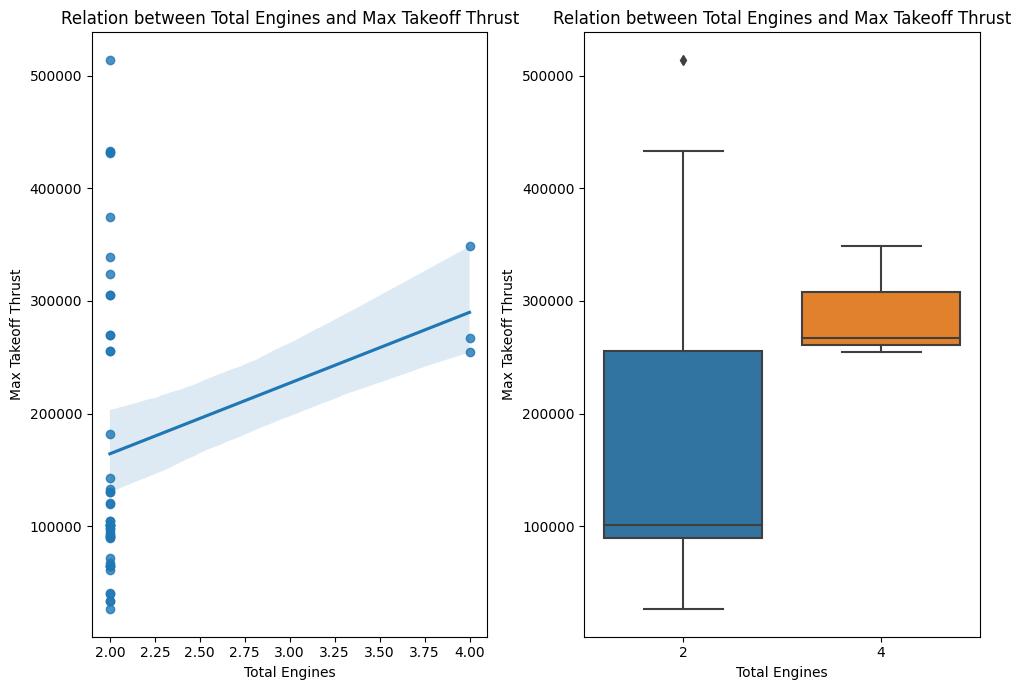

In [12]:
plt.figure(figsize=(10, 7))

# First subplot: Regression plot
plt.subplot(1, 2, 1)
sns.regplot(data=parameters_merged, x='Total_Engines', y='Max_Takeoff_Thrust')
plt.title("Relation between Total Engines and Max Takeoff Thrust")
plt.xlabel("Total Engines")
plt.ylabel("Max Takeoff Thrust")

# Second subplot: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=parameters_merged, x='Total_Engines', y='Max_Takeoff_Thrust')
plt.title("Relation between Total Engines and Max Takeoff Thrust")
plt.xlabel("Total Engines")
plt.ylabel("Max Takeoff Thrust")

plt.tight_layout()
plt.show()


In [9]:
# Calculate correlation coefficient
correlation = parameters_merged['Total_Engines'].corr(parameters_merged['Max_Takeoff_Thrust'])
print(f"Correlation coefficient between Total Engines and Max Takeoff Thrust: {correlation}")

Correlation coefficient between Total Engines and Max Takeoff Thrust: 0.23845664379379997


<p style="color: #C837A0;">The diagram above explains the relationship between the total number of engines and the maximum takeoff thrust.

<ul style="color: #C837A0;">
    <li> There is a general upward trend, as indicated by the positive slope of the regression line. This suggests that as the number of engines increases, the maximum takeoff thrust also tends to increase.
    <li> However, the spread of the data points indicates considerable variability in maximum takeoff thrust for a given number of engines. This could. This could be also due to the fact that we have 15 nan values out of 63 (23%), which affect the results in the graph
    <li> For aircraft with 2 engines, the distribution of maximum takeoff thrust shows a wider range, with some outliers at higher thrust values
    <li> For aircraft with 4 engines, the distribution is more concentrated around higher thrust values, with less variability compared to 2-engine aircraft. Furthermore, the Maximum Takeoff Thrust for 4 engine models in generally higher than with 2 models, something we already predicted. It shows that having more engines increases the Takeoff Thrust
    <li> A correlation coefficient of 0.238 indicates a weak positive relationship between the number of engines and the maximum takeoff thrust. While there is a tendency for aircraft with more engines to have higher takeoff thrust, the relationship is not very strong. Other factors likely influence the maximum takeoff thrust significantly.
</ul>


</p>

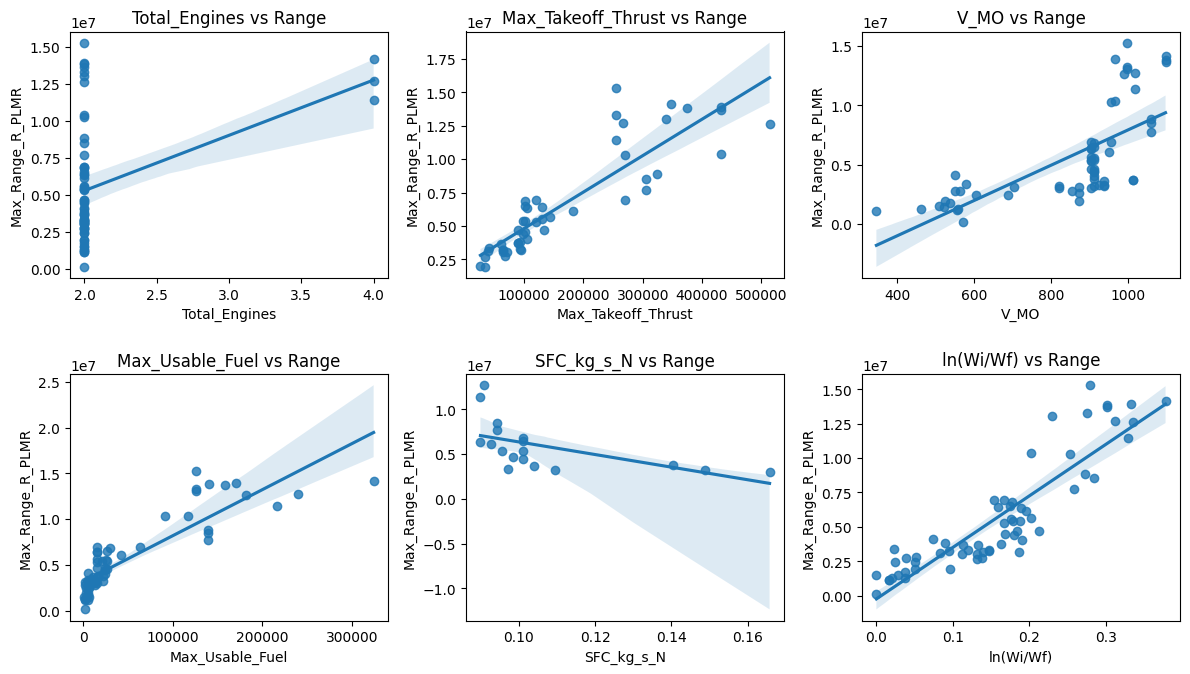

In [14]:
#Total_Engines affect max takeoff thrust and Max_Range_R_PLMR
#V_MO affects Max_Range_R_PLMR
#Max_Usable_Fuel affects Max_Range_R_PLMR
#SFC_kg_s_N affects Max_Range_R_PLMR
#ln(Wi/Wf)	affects Max_Range_R_PLMR

warnings.filterwarnings('ignore', category=np.RankWarning)
param = ['Total_Engines', 'Max_Takeoff_Thrust', 'V_MO', 'Max_Usable_Fuel', 'SFC_kg_s_N', 'ln(Wi/Wf)']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
axes = axes.flatten()


for i, param in enumerate(param):
    sns.regplot(data=parameters_merged, x=param, y='Max_Range_R_PLMR', order=1, ax=axes[i])
    axes[i].set_title(f'{param} vs Range')

plt.tight_layout()
plt.show()

<p style="color: #C837A0;">The following analysis is based on scatter plots with regression lines showing the relationship between various parameters and the maximum range of the aircraft (Max_Range_R_PLMR). These parameters are integral to the Breguet range equation, which estimates the range of an aircraft based on its aerodynamic efficiency, fuel consumption, and weight changes.

<ul style="color: #C837A0;">
    <li> More engines can contribute to higher thrust, potentially allowing the aircraft to carry more fuel and thus increase its range
    <li>Higher takeoff thrust allows the aircraft to carry more fuel and payload, which can contribute to a longer range. It also provides better performance in different flight phases, including takeoff, climb, and cruise.
    <li> V_MO, which is the acutal speed, is one of the parameters of the Breguet range equation. The plot shows positive correlation between the cruise speed and the range. This can be proven by the formula where there is a direct relation b/w speed & range.
    <li> Maximum usbale fuel, is not part of breguest equation directly; however, it affects the overall results. The more fuel an aircraft can carry, the longer it can fly without needing to refuel. This directly affects the range, as sufficient fuel is crucial for covering long distances.
    <li> Specific Fuel consumption (SFC_kg_s_N), is one of the parameters of reguet range equation. It's the is the fuel mass-flow rate divided by the thrust produced and therefore has units of kg/(Ns) <a href="https://web.mit.edu/16.unified/www/FALL/Unified_Concepts/Breguet-Range-U2-notes-Fall08(2).pdf">[1]</a>.  In the equation range is inversly proportional to specific fuel consumption.  This is means that the more efficent the engine, the lesser fuel it consumes, hence range increase. Our graph above indicates the same result.
    <li> Lastly, ln(Wi/Wf) (Logarithm of Weight Ratio). This parameter represents the efficiency of fuel consumption relative to the aircraft's weight. A higher ln(Wi/Wf) value indicates a significant reduction in weight due to fuel consumption, contributing to a longer range as the aircraft becomes lighter and more efficient during the flight.
</ul>

</p>

<p style="color: #C837A0;">The fuselage is the main body of the aircraft, and even though it has many critical functions, fuselage design is really crucical in impacting the drag and lift; hence, impacting overall aerodynamic efficiency. It's  designed with a streamlined shape. This reduces air resistance and improves fuel efficiency. We can check how does aircraft length, width, fuselage length, and fuselage width affect other parameters, such as: Maximum Takeoff Weight, Range, and maximum payload capacity of the aircraft (Max_Payload_m_MPL).


</p>

## <font style="color: #F4AC12;"> <strong>Fuselage & Aircraft Parameters vs Flight Mechanics </strong></font>

In [9]:
##Fuselage
fuselage_eval = parameters_merged[['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height', 'Max_Take_Off_m_MTO','Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Payload_at_Max_Range_m_PLMR']]
fuselage_eval

,Fuselage_Height,Fuselage_Width,Aircraft_Length,Aircraft_Height,Max_Take_Off_m_MTO,Max_Range_R_PLMR,Max_Payload_m_MPL,Payload_at_Max_Range_m_PLMR
0,3.72,3.51,38.70,11.50,70900,5391302.400,12300.0,6350
1,4.14,3.95,33.84,11.76,75500,6356908.800,23100.0,9800
2,4.14,3.95,33.84,11.76,75500,6920179.200,20700.0,11000
3,4.14,3.95,35.57,11.76,78000,5310835.200,19000.0,13000
4,4.14,3.95,35.57,11.76,79000,6437376.000,18500.0,12000
...,...,...,...,...,...,...,...,...
58,2.80,2.70,25.25,8.32,20820,2768071.680,5500.0,3300
59,3.30,3.30,35.53,8.42,45810,2768071.680,11993.0,9200
60,2.31,2.31,19.73,6.97,13605,1963399.680,3400.0,2450
61,NaN,NaN,29.94,10.28,45880,3048000.000,12245.0,NaN


In [8]:
fuselage_eval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fuselage_Height              57 non-null     float64
 1   Fuselage_Width               57 non-null     float64
 2   Aircraft_Length              63 non-null     float64
 3   Aircraft_Height              63 non-null     float64
 4   Max_Take_Off_m_MTO           63 non-null     int64  
 5   Max_Range_R_PLMR             63 non-null     float64
 6   Max_Payload_m_MPL            61 non-null     float64
 7   Payload_at_Max_Range_m_PLMR  55 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 4.4+ KB


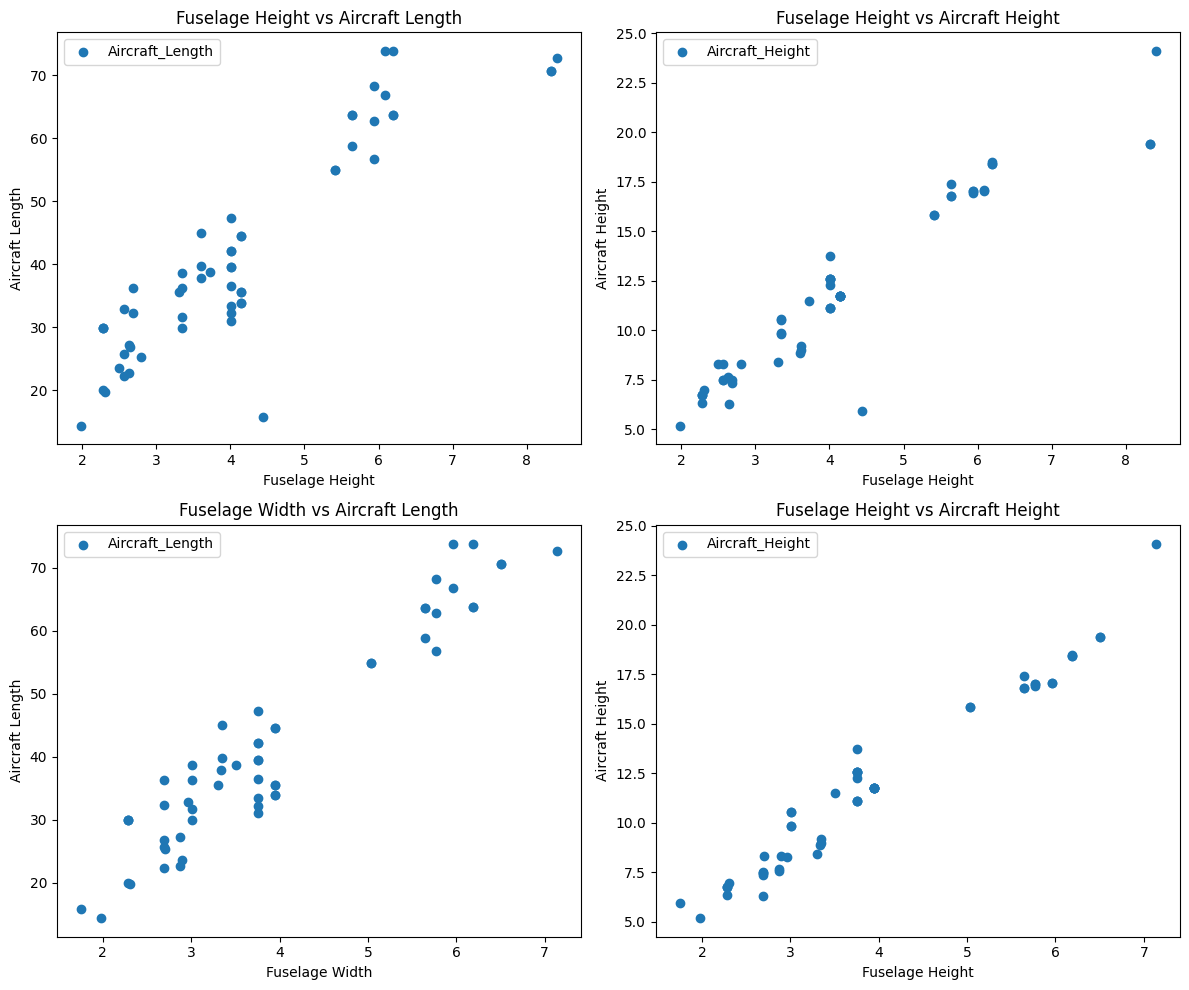

Pearson correlation between Fuselage_Height and Aircraft_Length: 0.9236458789068833
Pearson correlation between Fuselage_Width and Aircraft_Length: 0.9498891030547674
Pearson correlation between Fuselage_Height and Aircraft_Height: 0.9681182258296523
Pearson correlation between Fuselage_Width and Aircraft_Height: 0.9782026579238778


In [37]:
param = ['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height']

#Visualize the relationship b/w the variables

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(data=fuselage_eval, x='Fuselage_Height', y='Aircraft_Length')
plt.title("Fuselage Height vs Aircraft Length")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Length")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(data=fuselage_eval, x='Fuselage_Height', y='Aircraft_Height')
plt.title("Fuselage Height vs Aircraft Height")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Height")
plt.legend()


plt.subplot(2, 2, 3)
plt.scatter(data=fuselage_eval, x='Fuselage_Width', y='Aircraft_Length')
plt.title("Fuselage Width vs Aircraft Length")
plt.xlabel("Fuselage Width")
plt.ylabel("Aircraft Length")
plt.legend()



plt.subplot(2, 2, 4)
plt.scatter(data=fuselage_eval, x='Fuselage_Width', y='Aircraft_Height')
plt.title("Fuselage Height vs Aircraft Height")
plt.xlabel("Fuselage Height")
plt.ylabel("Aircraft Height")
plt.legend()



plt.tight_layout()
plt.show()



##Check the corrleation between the fuselage parameters & Aircraft length and Aircraft height parameters

fuselage_correl_data_cleaned = fuselage_eval.dropna()
pairs = [
    ('Fuselage_Height', 'Aircraft_Length'),
    ('Fuselage_Width', 'Aircraft_Length'),
    ('Fuselage_Height', 'Aircraft_Height'),
    ('Fuselage_Width', 'Aircraft_Height')
]

for x, y in pairs:
    corr, _ = stats.pearsonr(fuselage_correl_data_cleaned[x], fuselage_correl_data_cleaned[y])
    print(f'Pearson correlation between {x} and {y}: {corr}')

<p style="color: #C837A0;">Before examining how fuselage and aircraft parameters impact other flight mechanics parameters—such as Maximum Takeoff Weight, Range, Maximum Payload, and Maximum Payload at Maximum Range—we first explored the relationships between fuselage parameters and their influence on aircraft length and height.<br><br>
The Pearson correlation coefficients provide a measure of the linear relationship between pairs of variables. These values range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.<br><br>
Our analysis reveals a very strong positive relationship between each parameter pair. This suggests that fuselage parameters directly impact aircraft parameters, which in turn affect aerodynamics and flight mechanics.<br><br></p>

<p style="color: #C837A0;">
One surprising correlation is between fuselage width and aircraft height. The data indicates that as fuselage width increases, the overall height of the aircraft also tends to increase. This suggests that design considerations for fuselage width directly influence the overall height of the aircraft. Wider fuselages may necessitate larger vertical stabilizers and landing gear, contributing to the overall height of the aircraft.

<ul style="color: #C837A0;">
    <li> Max Takeoff Weight (Max_Take_Off_m_MTO): Understanding how fuselage dimensions influence the maximum weight an aircraft can safely take off with.</li>
    <li> Max Range (Max_Range_R_PLMR): Analyzing the impact of fuselage dimensions on the aircraft's maximum range, considering aerodynamic efficiency and fuel capacity.</li>
    <li> Max Payload (Max_Payload_m_MPL): Assessing how the internal volume and structural design affected by fuselage dimensions can influence the maximum payload capacity.</li>
    <li> Payload at Max Range (Payload_at_Max_Range_m_PLMR): Evaluating the balance between weight, aerodynamic efficiency, and fuel capacity to determine how fuselage dimensions impact the payload capacity at maximum range.</li>

</ul>
</p>

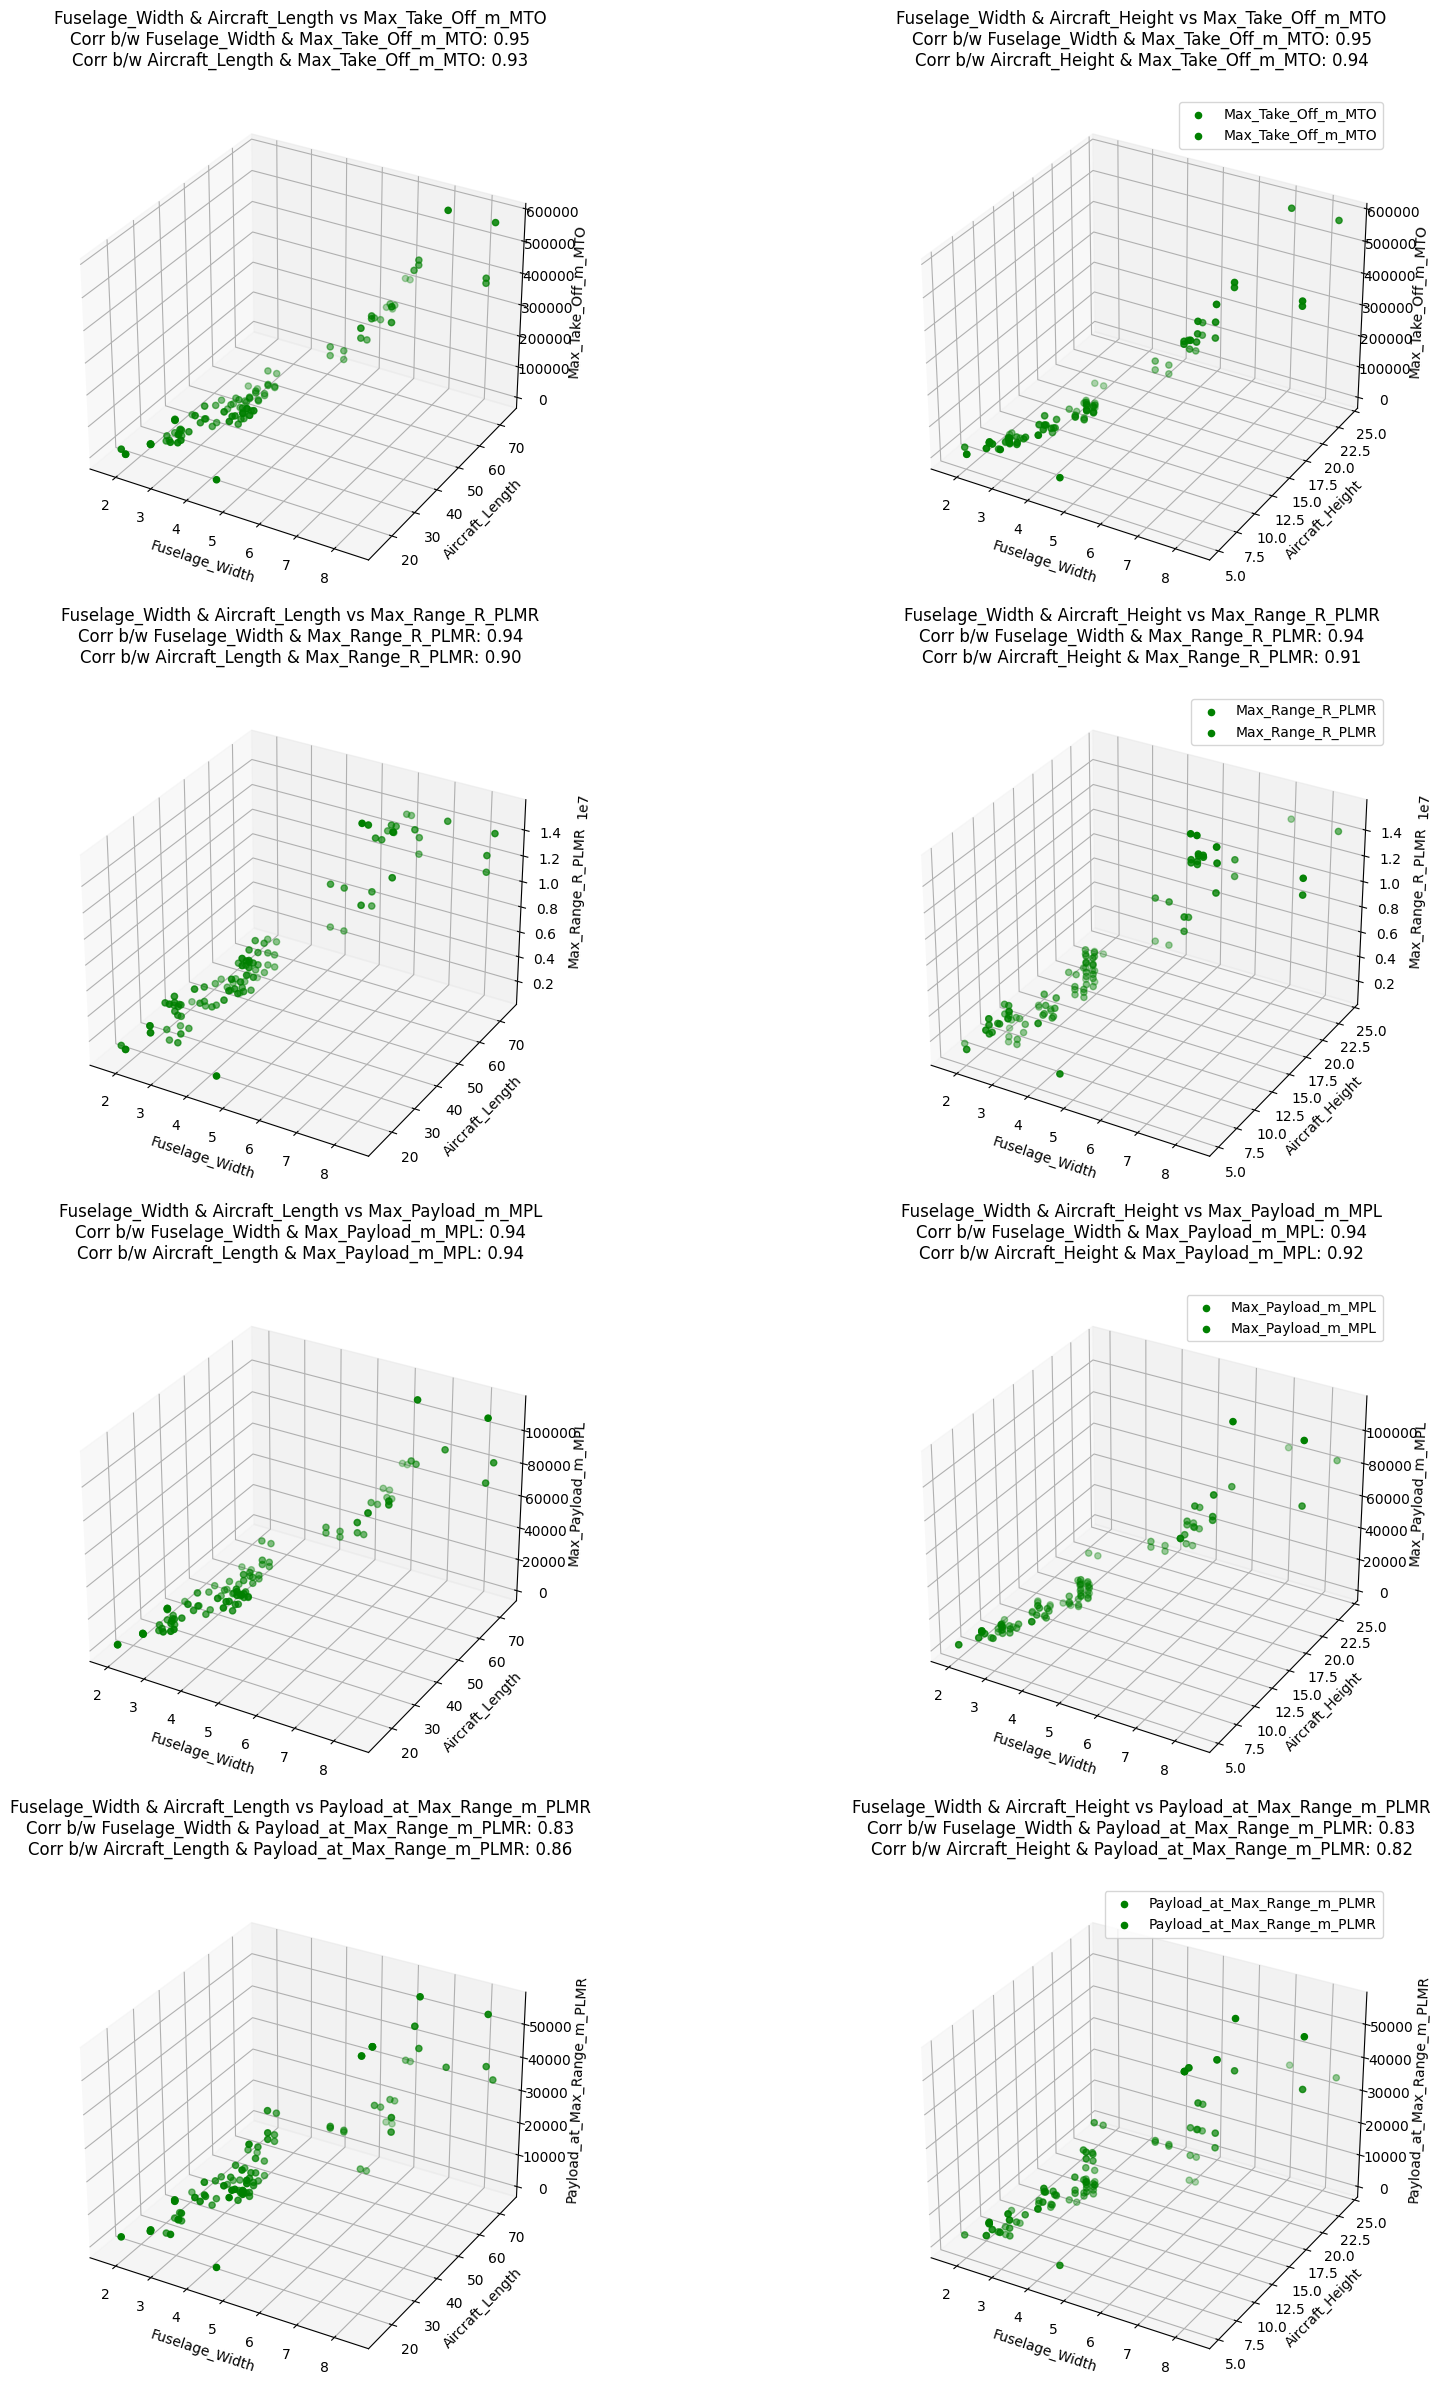

In [30]:
'''
Check 3 parameters: 
    (Fuselage_Height, Fuselage_Width) vs Max_Take_Off_m_MTO
    (Fuselage_Height, Fuselage_Width) vs Max_Range_R_PLMR
    (Fuselage_Height, Fuselage_Width) vs Max_Payload_m_MPL
    (Fuselage_Height, Fuselage_Width) vs Payload_at_Max_Range_m_PLMR


    (Aircraft_Length, Aircraft_Height) vs Max_Take_Off_m_MTO
    (Aircraft_Length, Aircraft_Height) vs Max_Range_R_PLMR
    (Aircraft_Length, Aircraft_Height) vs Max_Payload_m_MPL
    (Aircraft_Length, Aircraft_Height) vs Payload_at_Max_Range_m_PLMR


Note: Also try to understand how the meaning of the flight mechanics parameters, their affect in real life, and how our fuselage & aircraft 
parameters affect them
'''

fuselage_eval_cleaned = fuselage_eval.dropna()

fuselage_params = ['Fuselage_Height', 'Fuselage_Width']
aircraft_params = ['Aircraft_Length', 'Aircraft_Height']
eval_params = ['Max_Take_Off_m_MTO', 'Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Payload_at_Max_Range_m_PLMR']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24), subplot_kw={'projection': '3d'})
axes = axes.flatten()

for idx, eval_param in enumerate(eval_params):
    for i, fuselage_param in enumerate(fuselage_params):
        for j, aircraft_param in enumerate(aircraft_params):
            ax = axes[idx * 2 + j]
            
            # Calculate Pearson correlation coefficients
            corr_fuselage_eval, _ = stats.pearsonr(fuselage_eval_cleaned[fuselage_param], fuselage_eval_cleaned[eval_param])
            corr_aircraft_eval, _ = stats.pearsonr(fuselage_eval_cleaned[aircraft_param], fuselage_eval_cleaned[eval_param])
            
            ax.scatter3D(
                fuselage_eval[fuselage_param],
                fuselage_eval[aircraft_param],
                fuselage_eval[eval_param],
                label=f'{eval_param}',
                color='green'
            )
            ax.set_xlabel(fuselage_param)
            ax.set_ylabel(aircraft_param)
            ax.set_zlabel(eval_param)
            ax.set_title(f'{fuselage_param} & {aircraft_param} vs {eval_param}\n'
                         f'Corr b/w {fuselage_param} & {eval_param}: {corr_fuselage_eval:.2f}\n'
                         f'Corr b/w {aircraft_param} & {eval_param}: {corr_aircraft_eval:.2f}\n'
                         )
            
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



 <ul  style="color: #44C837;"> 
    <li> Understand each of the parameter above (✅)</li>
    <li> Understand how each of these parameters are affected by fuselage and aircraft length (✅)</li>
    <li> Also check relationship b/w fuselage and wingspan (❌)</li>
 </ul>

<ul style="color: #C837A0;">
<li> <strong> Maximum TakeOff Weight (Max_Take_Off_m_MTO): </strong>The MTOW of an aircraft is the maximum mass, defined by the aircraft manufacturer (due to structural or other limits), at which the aircraft is certified for take off <a href="https://ansperformance.eu/acronym/mtow/#:~:text=The%20MTOW%20of%20an%20aircraft,is%20certified%20for%20take%20off.">[2]</a>.  Generally, longer fuselages and aircraft lengths allow for more capacity for fuel and cargo, contributing to higher maximum takeoff weights. This can also be proven from the image above which shown a strong correlation b/w fuselage parameters and aircraft parameters to aximum TakeOff Weight. Furthermore, an exponential increase in Maximum TakeOff Weight also shows that increasing even one of the parameters can significantly increase the Maximum TakeOff Weight. </li>
</li> <strong> Maximum Payload (Max_Payload_m_MPL):</strong> Payload Capacity in aviation refers to the maximum weight of passengers, cargo, and any additional items that an aircraft can carry beyond its empty weight (the weight of the aircraft without payload or fuel)<a href="https://www.globeair.com/g/payload-capacity">[3]</a>. Larger fuselage and aircraft dimensions allow for more passenger seats and cargo space, increasing the maximum payload capacity. These results can also be proven from the image above which shown a strong correlation b/w fuselage parameters and aircraft parameters to Maximum Payload. </li>
<li> <strong>Payload at Max Range (Payload_at_Max_Range_m_PLMR):</strong> The weight of cargo and passengers that the aircraft can carry at its maximum range. The fuselage length and aircraft size affect the aircraft's efficiency and capacity to carry payload over long distances. Larger aircraft can optimize fuel storage and payload distribution to maximize range.</li>


</ul>

## <font style="color: #F4AC12;"> <strong>Aircraft Weight Parameters Vs Range </strong></font>

 <ul  style="color: #44C837;">
   <li> Check how these other parameters affect range. Like Take off weight, payload etc affect range (❌) -> For example Payload at Max Range affect range of the aircraft <a href="https://en.wikipedia.org/wiki/Payload#/media/File:Payloadrange.jpg.">check the image</a>.</li>
    <li> There is a relationship b/w max payload and max take off weight of range. For example, if we wanna increase range, we need to increase payload for more fuel but then we need to make sure that we reduce Maximum TakeOff Weight inorder to add more fuel. Check these combinations too <a href="https://www.youtube.com/watch?v=1CDGj9b7FgI">check the video</a>.</li>
    <li> There is a relationship b/w max payload and max take off weight of range. For example, if we wanna increase range, we need to increase payload for more fuel but then we need to make sure that we reduce Maximum TakeOff Weight inorder to add more fuel. Check these combinations too <a href="https://www.youtube.com/watch?v=1CDGj9b7FgI">check the video</a> (❌).</li>
    <li> Also check how all these weight parameters affect range. For example, create range in x axis, and on y axis all of these parameters like TakeOff Weight, Payload, Zero Fuel Weight, etc, and see how increasing range affect these values. Do the acutally follow the range payload diagram <a href="https://www.youtube.com/watch?v=rJppxGCwsTI">check the video</a>.(❌)</li>
    <li> Create a network. For example how each parameter affect range at the end. For example, fuselage paramteres -> Takeoff weight -> Range (❌)</li>
 </ul>

In [10]:
aircraft_weight_param = parameters_merged[['Fuselage_Height', 'Fuselage_Width', 'Aircraft_Length', 'Aircraft_Height', 'Max_Take_Off_m_MTO','Max_Range_R_PLMR', 'Max_Payload_m_MPL', 'Max_Landing_m_ML', 'Max_Zero_Fuel', 'Operating_Empty_m_OE', 'Payload_at_Max_Range_m_PLMR']]
aircraft_weight_param

,Fuselage_Height,Fuselage_Width,Aircraft_Length,Aircraft_Height,Max_Take_Off_m_MTO,Max_Range_R_PLMR,Max_Payload_m_MPL,Max_Landing_m_ML,Max_Zero_Fuel,Operating_Empty_m_OE,Payload_at_Max_Range_m_PLMR
0,3.72,3.51,38.70,11.50,70900,5391302.400,12300.0,58800,55800.0,43500,6350
1,4.14,3.95,33.84,11.76,75500,6356908.800,23100.0,62500,58500.0,35400,9800
2,4.14,3.95,33.84,11.76,75500,6920179.200,20700.0,63900,60300.0,39600,11000
3,4.14,3.95,35.57,11.76,78000,5310835.200,19000.0,66000,62500.0,43500,13000
4,4.14,3.95,35.57,11.76,79000,6437376.000,18500.0,67400,64300.0,45800,12000
...,...,...,...,...,...,...,...,...,...,...,...
58,2.80,2.70,25.25,8.32,20820,2768071.680,5500.0,20030,18900.0,13400,3300
59,3.30,3.30,35.53,8.42,45810,2768071.680,11993.0,39915,36740.0,24747,9200
60,2.31,2.31,19.73,6.97,13605,1963399.680,3400.0,12930,12020.0,8620,2450
61,NaN,NaN,29.94,10.28,45880,3048000.000,12245.0,41000,40000.0,25100,NaN


## <font style="color: #F4AC12;"> <strong>Aerodynamics Parameters vs Flight Mechanics </strong></font>

  <ul  style="color: #44C837;"> 
    <li> Also check relationship b/w fuselage and wingspan (❌)</li>
    <li> Focus on aerodynamice dataset, and see how it affect other important parameters </li>
 </ul>

## <font style="color: #F4AC12;"> <strong>TurboFan Parameters </strong></font>

# <font color=33FFF9>**Machine Learning Models**</font>